In [231]:
import pandas as pd
import numpy as np

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
data=pd.read_csv('train.csv')

In [234]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [235]:
data.shape

(891, 12)

In [236]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [237]:
missing=(data.isnull().sum())
total=data.shape[0]

percentages=(missing/total)*100

In [238]:
percentages

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

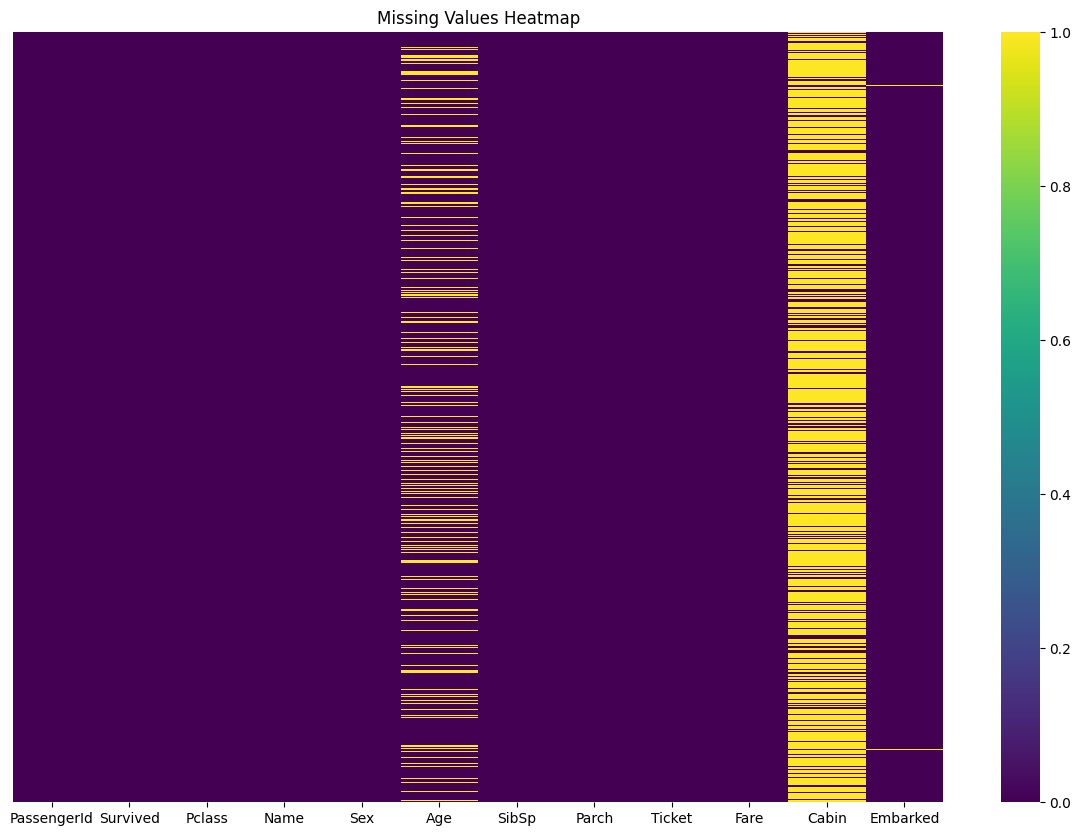

In [239]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap to visualize missing values
plt.figure(figsize=(15, 10))  # Increase plot size
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [240]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

<ipython-input-240-0ee082975bad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-240-0ee082975bad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

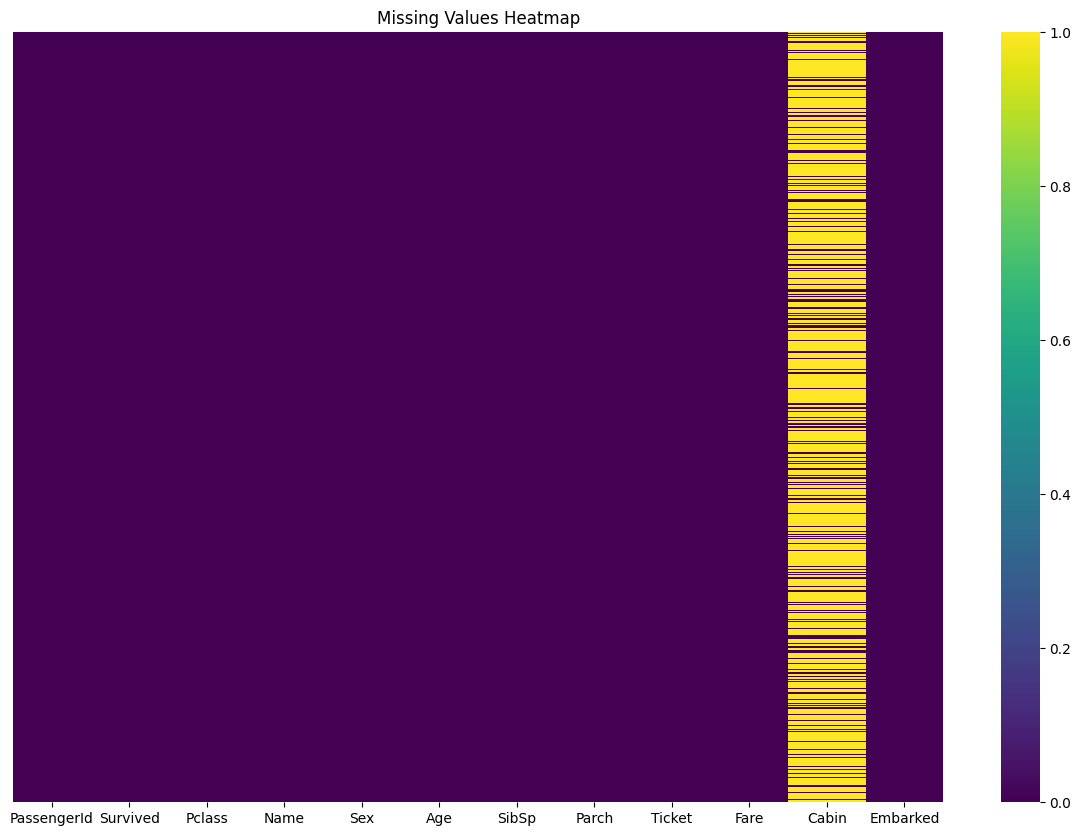

In [241]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap to visualize missing values
plt.figure(figsize=(15, 10))  # Increase plot size
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [242]:
data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [243]:
# prompt: remove numbers from cabin column values like i want to create another column based on that cabin column like B96 turned into B and G6 turned into G like that

# Extract the first letter from the 'Cabin' column and create a new column 'Deck'
data['Deck'] = data['Cabin'].str.extract('([A-Za-z])', expand=False)

# You can then view the updated DataFrame
print(data[['Cabin', 'Deck']].head())

  Cabin Deck
0   NaN  NaN
1   C85    C
2   NaN  NaN
3  C123    C
4   NaN  NaN


In [244]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Deck  
0      0         A/5 21171   7.2500   NaN        S  NaN  
1      0          PC 17599  71.2833   C85        C    C  
2      0  STON/O2. 3101282   7.9250   NaN        S  NaN  
3      0            113803  53.1000  C123        S    C  
4      0            373450   8.0500   NaN        S  NaN

In [245]:
data['Deck'].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [246]:
data['Deck'].fillna('NoCabin',inplace=True)

<ipython-input-246-ec527356a160>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Deck'].fillna('NoCabin',inplace=True)


In [247]:
data['Deck'].value_counts()

Deck
NoCabin    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

In [248]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
dtype: int64

In [249]:
cabin=data.copy()

In [250]:
data.drop(columns=['Cabin'],axis=1,inplace=True)

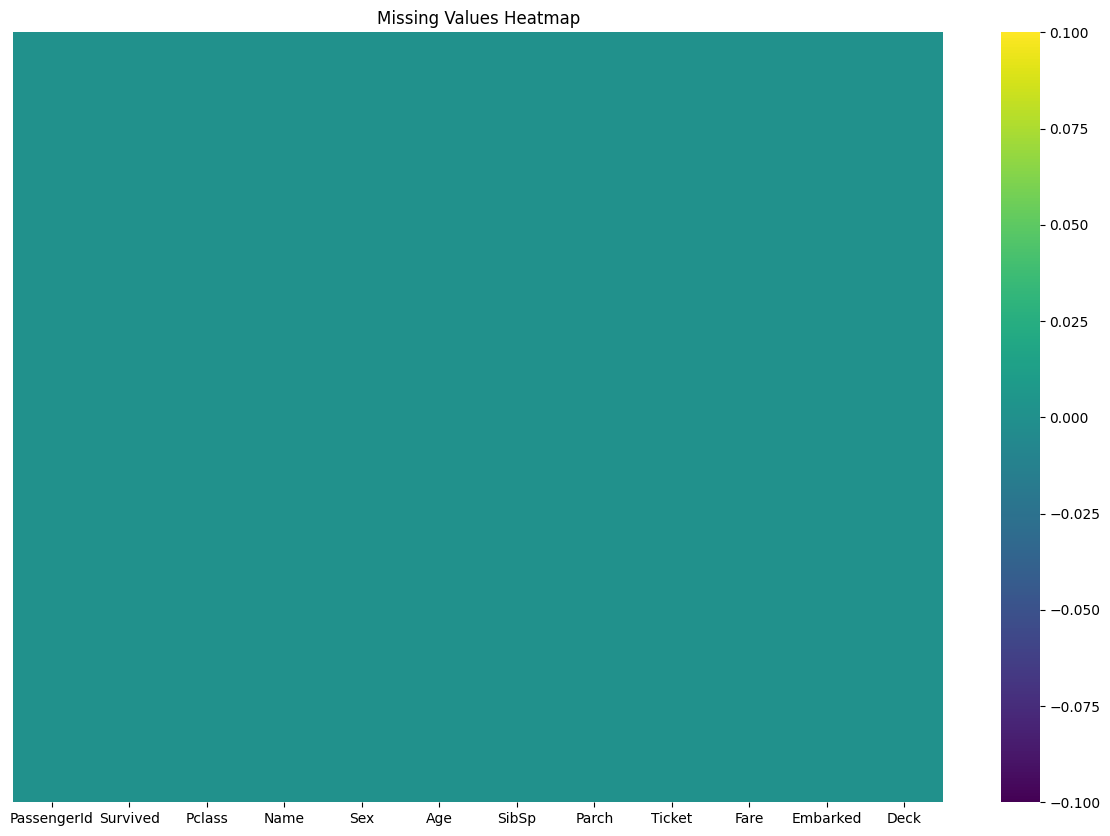

In [251]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap to visualize missing values
plt.figure(figsize=(15, 10))  # Increase plot size
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [252]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked     Deck  
0      0         A/5 21171   7.2500        S  NoCabin  
1      0          PC 17599  71.2833        C        C  
2      0  STON/O2. 3101282   7.9250        S  NoCabin  
3      0            113803  53.1000        S        C  
4      0            373450   8.0500        S  NoCabin

In [253]:
data.drop(columns=['is_deck_missing'],axis=1,inplace=True)

KeyError: "['is_deck_missing'] not found in axis"

In [ ]:
data.head()

In [ ]:
data.drop(columns=['PassengerId'],axis=1,inplace=True)

In [254]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked     Deck  
0      0         A/5 21171   7.2500        S  NoCabin  
1      0          PC 17599  71.2833        C        C  
2      0  STON/O2. 3101282   7.9250        S  NoCabin  
3      0            113803  53.1000        S        C  
4      0            373450   8.0500        S  NoCabin

In [255]:
def encode_deck_minimal(df):
    df = df.copy()

    # 1. Binary flag for having cabin
    df['has_cabin'] = (df['Deck'] != 'NoCabin').astype(int)

    # 2. Simple ordinal encoding for deck levels
    deck_groups = {
        'A': 'upper',
        'B': 'upper',
        'C': 'upper',
        'D': 'middle',
        'E': 'middle',
        'F': 'lower',
        'G': 'lower',
        'NoCabin': 'NoCabin'
    }

    level_to_num = {
        'upper': 3,
        'middle': 2,
        'lower': 1,
        'NoCabin': 0
    }

    df['deck_level'] = df['Deck'].map(deck_groups).map(level_to_num)

    return df

# Usage
df_encoded = encode_deck_minimal(data)

In [256]:
df_encoded

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Embarked     Deck  has_cabin  \
0        1      0         A/5 21171   7.2500        S  NoCabin          0   
1        1      0          PC 17599  71.2833        C        C          1   
2        0      0  STON/O2. 3101282   7.9250        S  NoCabin          0   
3        1      0            113803  53.1000        S        C          1   
4        0      0            373450   8.0500        S  NoCabin          0   
..     ...    ...               ...      ...      ...      ...        ...   
886      0      0            211536  13.0000        S  NoCabin          0   
887      0      0            112053  30.0000        S        B          1   
888      1      2        W./C. 6607  23.4500        S  NoCabin          0   
889      0      0            111369  30.0000        C        C          1   
890      0      0            370376   7.7500        Q  NoCabin          0   

     deck_level  
0           0.0  
1           3.0  
2           0.0  
3           3.0  
4           0.0  
..          ...  
886         0.0  
887         3.0  
888         0.0  
889         3.0  
890         0.0  

[891 rows x 14 columns]

In [257]:
df_encoded.drop(columns=['Deck'],axis=1,inplace=True)

In [258]:
df_encoded.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  has_cabin  deck_level  
0      0         A/5 21171   7.2500        S          0         0.0  
1      0          PC 17599  71.2833        C          1         3.0  
2      0  STON/O2. 3101282   7.9250        S          0         0.0  
3      0            113803  53.1000        S          1         3.0  
4      0            373450   8.0500        S          0         0.0

In [259]:
def encode_sex(df):
    # Create single binary column (0 for female, 1 for male)
    df['sex_encoded'] = (df['Sex'] == 'male').astype(int)
    return df

# Usage
df = encode_sex(df_encoded)

In [260]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  has_cabin  deck_level  \
0      0         A/5 21171   7.2500        S          0         0.0   
1      0          PC 17599  71.2833        C          1         3.0   
2      0  STON/O2. 3101282   7.9250        S          0         0.0   
3      0            113803  53.1000        S          1         3.0   
4      0            373450   8.0500        S          0         0.0   

   sex_encoded  
0            1  
1            0  
2            0  
3            0  
4            1

In [261]:
df.drop(columns=['Sex'],axis=1,inplace=True)

In [262]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Embarked  has_cabin  deck_level  sex_encoded  
0         A/5 21171   7.2500        S          0         0.0            1  
1          PC 17599  71.2833        C          1         3.0            0  
2  STON/O2. 3101282   7.9250        S          0         0.0            0  
3            113803  53.1000        S          1         3.0            0  
4            373450   8.0500        S          0         0.0            1

In [263]:
# Using split and get first part
df['Surname'] = df['Name'].str.split(',').str[0]

# Example:
# 'Braund, Mr. Owen Harris' -> 'Braund'

In [264]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Embarked  has_cabin  deck_level  sex_encoded  \
0         A/5 21171   7.2500        S          0         0.0            1   
1          PC 17599  71.2833        C          1         3.0            0   
2  STON/O2. 3101282   7.9250        S          0         0.0            0   
3            113803  53.1000        S          1         3.0            0   
4            373450   8.0500        S          0         0.0            1   

     Surname  
0     Braund  
1    Cumings  
2  Heikkinen  
3   Futrelle  
4      Allen

In [265]:
df['Surname'].value_counts()

Surname
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

In [266]:
df['Surname'].isnull().sum()

0

In [267]:
df.drop(columns=['Name'],axis=1,inplace=True)

In [268]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare Embarked  has_cabin  deck_level  sex_encoded    Surname  
0   7.2500        S          0         0.0            1     Braund  
1  71.2833        C          1         3.0            0    Cumings  
2   7.9250        S          0         0.0            0  Heikkinen  
3  53.1000        S          1         3.0            0   Futrelle  
4   8.0500        S          0         0.0            1      Allen

In [269]:
len(df['Surname'].value_counts())

667

In [270]:
# prompt: create label encoder for surname column

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Surname' column
df['Surname_encoded'] = le.fit_transform(df['Surname'])

df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare Embarked  has_cabin  deck_level  sex_encoded    Surname  \
0   7.2500        S          0         0.0            1     Braund   
1  71.2833        C          1         3.0            0    Cumings   
2   7.9250        S          0         0.0            0  Heikkinen   
3  53.1000        S          1         3.0            0   Futrelle   
4   8.0500        S          0         0.0            1      Allen   

   Surname_encoded  
0               73  
1              136  
2              251  
3              198  
4               11

In [271]:
df.drop(columns=['Surname'],axis=1,inplace=True)

In [272]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare Embarked  has_cabin  deck_level  sex_encoded  Surname_encoded  
0   7.2500        S          0         0.0            1               73  
1  71.2833        C          1         3.0            0              136  
2   7.9250        S          0         0.0            0              251  
3  53.1000        S          1         3.0            0              198  
4   8.0500        S          0         0.0            1               11

In [273]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [274]:
# prompt: perform ordinal encoding on top of Embarked column

# Assuming 'df' is your DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Embarked' column
df['Embarked_encoded'] = le.fit_transform(df['Embarked'])

df.head()
df.drop(columns=['Embarked'],axis=1,inplace=True)
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  has_cabin  deck_level  sex_encoded  Surname_encoded  \
0   7.2500          0         0.0            1               73   
1  71.2833          1         3.0            0              136   
2   7.9250          0         0.0            0              251   
3  53.1000          1         3.0            0              198   
4   8.0500          0         0.0            1               11   

   Embarked_encoded  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2

In [275]:
df['Embarked_encoded'].unique()

array([2, 0, 1])

In [276]:
Ticket_split = []
Ticket_len = []
for i in df['Ticket'].index:
    splitted = df.loc[i,'Ticket'].split(' ')
    Ticket_split.append(splitted)
    length = len(splitted)
    Ticket_len.append(length)

df['Ticket_split'] = Ticket_split
df['Ticket_len'] = Ticket_len

# df[['Ticket_len']].value_counts()
# df.loc[df['Ticket_len'] > 2, :] We can see tome typo errors.

# Create columns Ticket_preffix and Ticket_number
ticket_preffix = []
ticket_number = []
for i in df['Ticket'].index:
    ticket_parts = df.loc[i, 'Ticket_split']
    number = ticket_parts[-1]
    ticket_number.append(number)
    length = df.loc[i, 'Ticket_len'].item()
    if length > 1:
        preffix = ''.join(ticket_parts[0:-1])
        ticket_preffix.append(preffix)
    else:
        ticket_preffix.append('blanck')

df['Ticket_preffix'] = ticket_preffix
df['Ticket_number'] = ticket_number
# drop unnecessary columns created
df.drop(columns=['Ticket_split', 'Ticket_len'], inplace=True)

df.Ticket_preffix.unique()

array(['A/5', 'PC', 'STON/O2.', 'blanck', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'SC/AHBasle',
       'A/4', 'WE/P', 'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2',
       'S.C./PARIS', 'C.A./SOTON'], dtype=object)

In [277]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked     Deck  
0      0         A/5 21171   7.2500        S  NoCabin  
1      0          PC 17599  71.2833        C        C  
2      0  STON/O2. 3101282   7.9250        S  NoCabin  
3      0            113803  53.1000        S        C  
4      0            373450   8.0500        S  NoCabin

In [278]:
data=pd.concat([data,df['Ticket_preffix']], axis=1)

In [279]:
df_grouped = data.groupby(['Ticket_preffix', 'Embarked']).agg({'Survived': ['sum', lambda x: x.count() - x.sum()]})
df_grouped.columns = ['Survived', 'Non-Survived']
df_grouped['Count'] = data.groupby(['Ticket_preffix', 'Embarked']).size()
print(df_grouped)

                         Survived  Non-Survived  Count
Ticket_preffix Embarked                               
A./5.          S                0             2      2
A.5.           S                0             2      2
A/4            S                0             3      3
A/4.           S                0             3      3
A/5            S                1             9     10
A/5.           Q                0             1      1
               S                1             5      6
A/S            S                0             1      1
A4.            S                0             1      1
C              S                2             3      5
C.A.           S               13            14     27
C.A./SOTON     S                0             1      1
CA             S                0             6      6
CA.            S                1             7      8
F.C.           S                0             1      1
F.C.C.         S                4             1      5
Fa        

In [280]:
n_alone , n_duplicates = df['Ticket'].duplicated(keep=False).astype(int).value_counts()
print("Number of duplicated ticket values:", n_duplicates)
print("Number of non-duplicated ticket values:", n_alone)

Number of duplicated ticket values: 344
Number of non-duplicated ticket values: 547


In [281]:
df['Companions'] = df['Ticket'].duplicated(keep=False).astype(int) * data.groupby('Ticket')['Ticket'].transform('count') -1
df.loc[df['Companions'] == -1, 'Companions'] = 0

In [282]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  has_cabin  deck_level  sex_encoded  Surname_encoded  \
0   7.2500          0         0.0            1               73   
1  71.2833          1         3.0            0              136   
2   7.9250          0         0.0            0              251   
3  53.1000          1         3.0            0              198   
4   8.0500          0         0.0            1               11   

   Embarked_encoded Ticket_preffix Ticket_number  Companions  
0                 2            A/5         21171           0  
1                 0             PC         17599           0  
2                 2       STON/O2.       3101282           0  
3                 2         blanck        113803           1  
4                 2         blanck        373450           0

In [283]:
df['Companions'].value_counts()

Companions
0    547
1    188
2     63
3     44
6     21
5     18
4     10
Name: count, dtype: int64

In [284]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  has_cabin  deck_level  sex_encoded  Surname_encoded  \
0   7.2500          0         0.0            1               73   
1  71.2833          1         3.0            0              136   
2   7.9250          0         0.0            0              251   
3  53.1000          1         3.0            0              198   
4   8.0500          0         0.0            1               11   

   Embarked_encoded Ticket_preffix Ticket_number  Companions  
0                 2            A/5         21171           0  
1                 0             PC         17599           0  
2                 2       STON/O2.       3101282           0  
3                 2         blanck        113803           1  
4                 2         blanck        373450           0

In [285]:
df['Ticket_preffix'].value_counts()

Ticket_preffix
blanck        665
PC             60
C.A.           27
STON/O2.       18
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
A/4.            3
S.O./P.P.       3
PP              3
A/4             3
A.5.            2
S.C./PARIS      2
SOTON/O2        2
P/PP            2
SC/AH           2
WE/P            2
A./5.           2
SC/AHBasle      1
SO/C            1
S.W./PP         1
F.C.            1
A/S             1
SW/PP           1
SC              1
SCO/W           1
W/C             1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
W.E.P.          1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [286]:
len(df['Ticket_preffix'].unique())

43

In [287]:
# prompt: perform label encoding on top of ticket_preffix

# Assuming 'df' is your DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Ticket_preffix' column
df['Ticket_preffix_encoded'] = le.fit_transform(df['Ticket_preffix'])

df.head()
df.drop(columns=['Ticket_preffix'],axis=1,inplace=True)
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  has_cabin  deck_level  sex_encoded  Surname_encoded  \
0   7.2500          0         0.0            1               73   
1  71.2833          1         3.0            0              136   
2   7.9250          0         0.0            0              251   
3  53.1000          1         3.0            0              198   
4   8.0500          0         0.0            1               11   

   Embarked_encoded Ticket_number  Companions  Ticket_preffix_encoded  
0                 2         21171           0                       4  
1                 0         17599           0                      17  
2                 2       3101282           0                      36  
3                 2        113803           1                      42  
4                 2        373450           0                      42

In [288]:
df.drop(columns=['Ticket'],axis=1,inplace=True)

In [289]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  has_cabin  \
0            1         0       3  22.0      1      0   7.2500          0   
1            2         1       1  38.0      1      0  71.2833          1   
2            3         1       3  26.0      0      0   7.9250          0   
3            4         1       1  35.0      1      0  53.1000          1   
4            5         0       3  35.0      0      0   8.0500          0   

   deck_level  sex_encoded  Surname_encoded  Embarked_encoded Ticket_number  \
0         0.0            1               73                 2         21171   
1         3.0            0              136                 0         17599   
2         0.0            0              251                 2       3101282   
3         3.0            0              198                 2        113803   
4         0.0            1               11                 2        373450   

   Companions  Ticket_preffix_encoded  
0           0                       4  
1           0                      17  
2           0                      36  
3           1                      42  
4           0                      42

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Age                     891 non-null    float64
 4   SibSp                   891 non-null    int64  
 5   Parch                   891 non-null    int64  
 6   Fare                    891 non-null    float64
 7   has_cabin               891 non-null    int64  
 8   deck_level              890 non-null    float64
 9   sex_encoded             891 non-null    int64  
 10  Surname_encoded         891 non-null    int64  
 11  Embarked_encoded        891 non-null    int64  
 12  Ticket_number           891 non-null    object 
 13  Companions              891 non-null    int64  
 14  Ticket_preffix_encoded  891 non-null    in

In [291]:
df['Ticket_number'].unique()

array(['21171', '17599', '3101282', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', '9549', '113783', '2151', '347082',
       '350406', '248706', '382652', '244373', '345763', '2649', '239865',
       '248698', '330923', '113788', '347077', '2631', '19950', '330959',
       '349216', '17601', '17569', '335677', '24579', '17604', '113789',
       '2677', '2152', '345764', '2651', '7546', '11668', '349253',
       '2123', '330958', '23567', '370371', '14311', '2662', '349237',
       '3101295', '39886', '17572', '2926', '113509', '19947', '31026',
       '2697', '34651', '2144', '2669', '113572', '36973', '347088',
       '17605', '2661', '29395', '3464', '3101281', '315151', '33111',
       '14879', '2680', '1601', '348123', '349208', '374746', '248738',
       '364516', '345767', '345779', '330932', '113059', '14885',
       '3101278', '6608', '392086', '343275', '343276', '347466', '5734',
       '2315', '364500', '374910', '17754', '17759', '231919', '244

In [292]:
# prompt: change ticket_number type using astype function

# Assuming 'df' is your DataFrame and 'Ticket_number' column contains ticket numbers as strings

# Convert 'Ticket_number' to numeric type, handling errors by replacing invalid values with NaN
df['Ticket_number'] = pd.to_numeric(df['Ticket_number'], errors='coerce')

# Then, you can replace NaN values with a specific value, like 0:
df['Ticket_number'].fillna(0, inplace=True)

# Finally, you can convert the column to the desired integer type:
df['Ticket_number'] = df['Ticket_number'].astype(int)

# Now, 'Ticket_number' should be of the integer type

<ipython-input-292-f3416f7b9921>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ticket_number'].fillna(0, inplace=True)


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Age                     891 non-null    float64
 4   SibSp                   891 non-null    int64  
 5   Parch                   891 non-null    int64  
 6   Fare                    891 non-null    float64
 7   has_cabin               891 non-null    int64  
 8   deck_level              890 non-null    float64
 9   sex_encoded             891 non-null    int64  
 10  Surname_encoded         891 non-null    int64  
 11  Embarked_encoded        891 non-null    int64  
 12  Ticket_number           891 non-null    int64  
 13  Companions              891 non-null    int64  
 14  Ticket_preffix_encoded  891 non-null    in

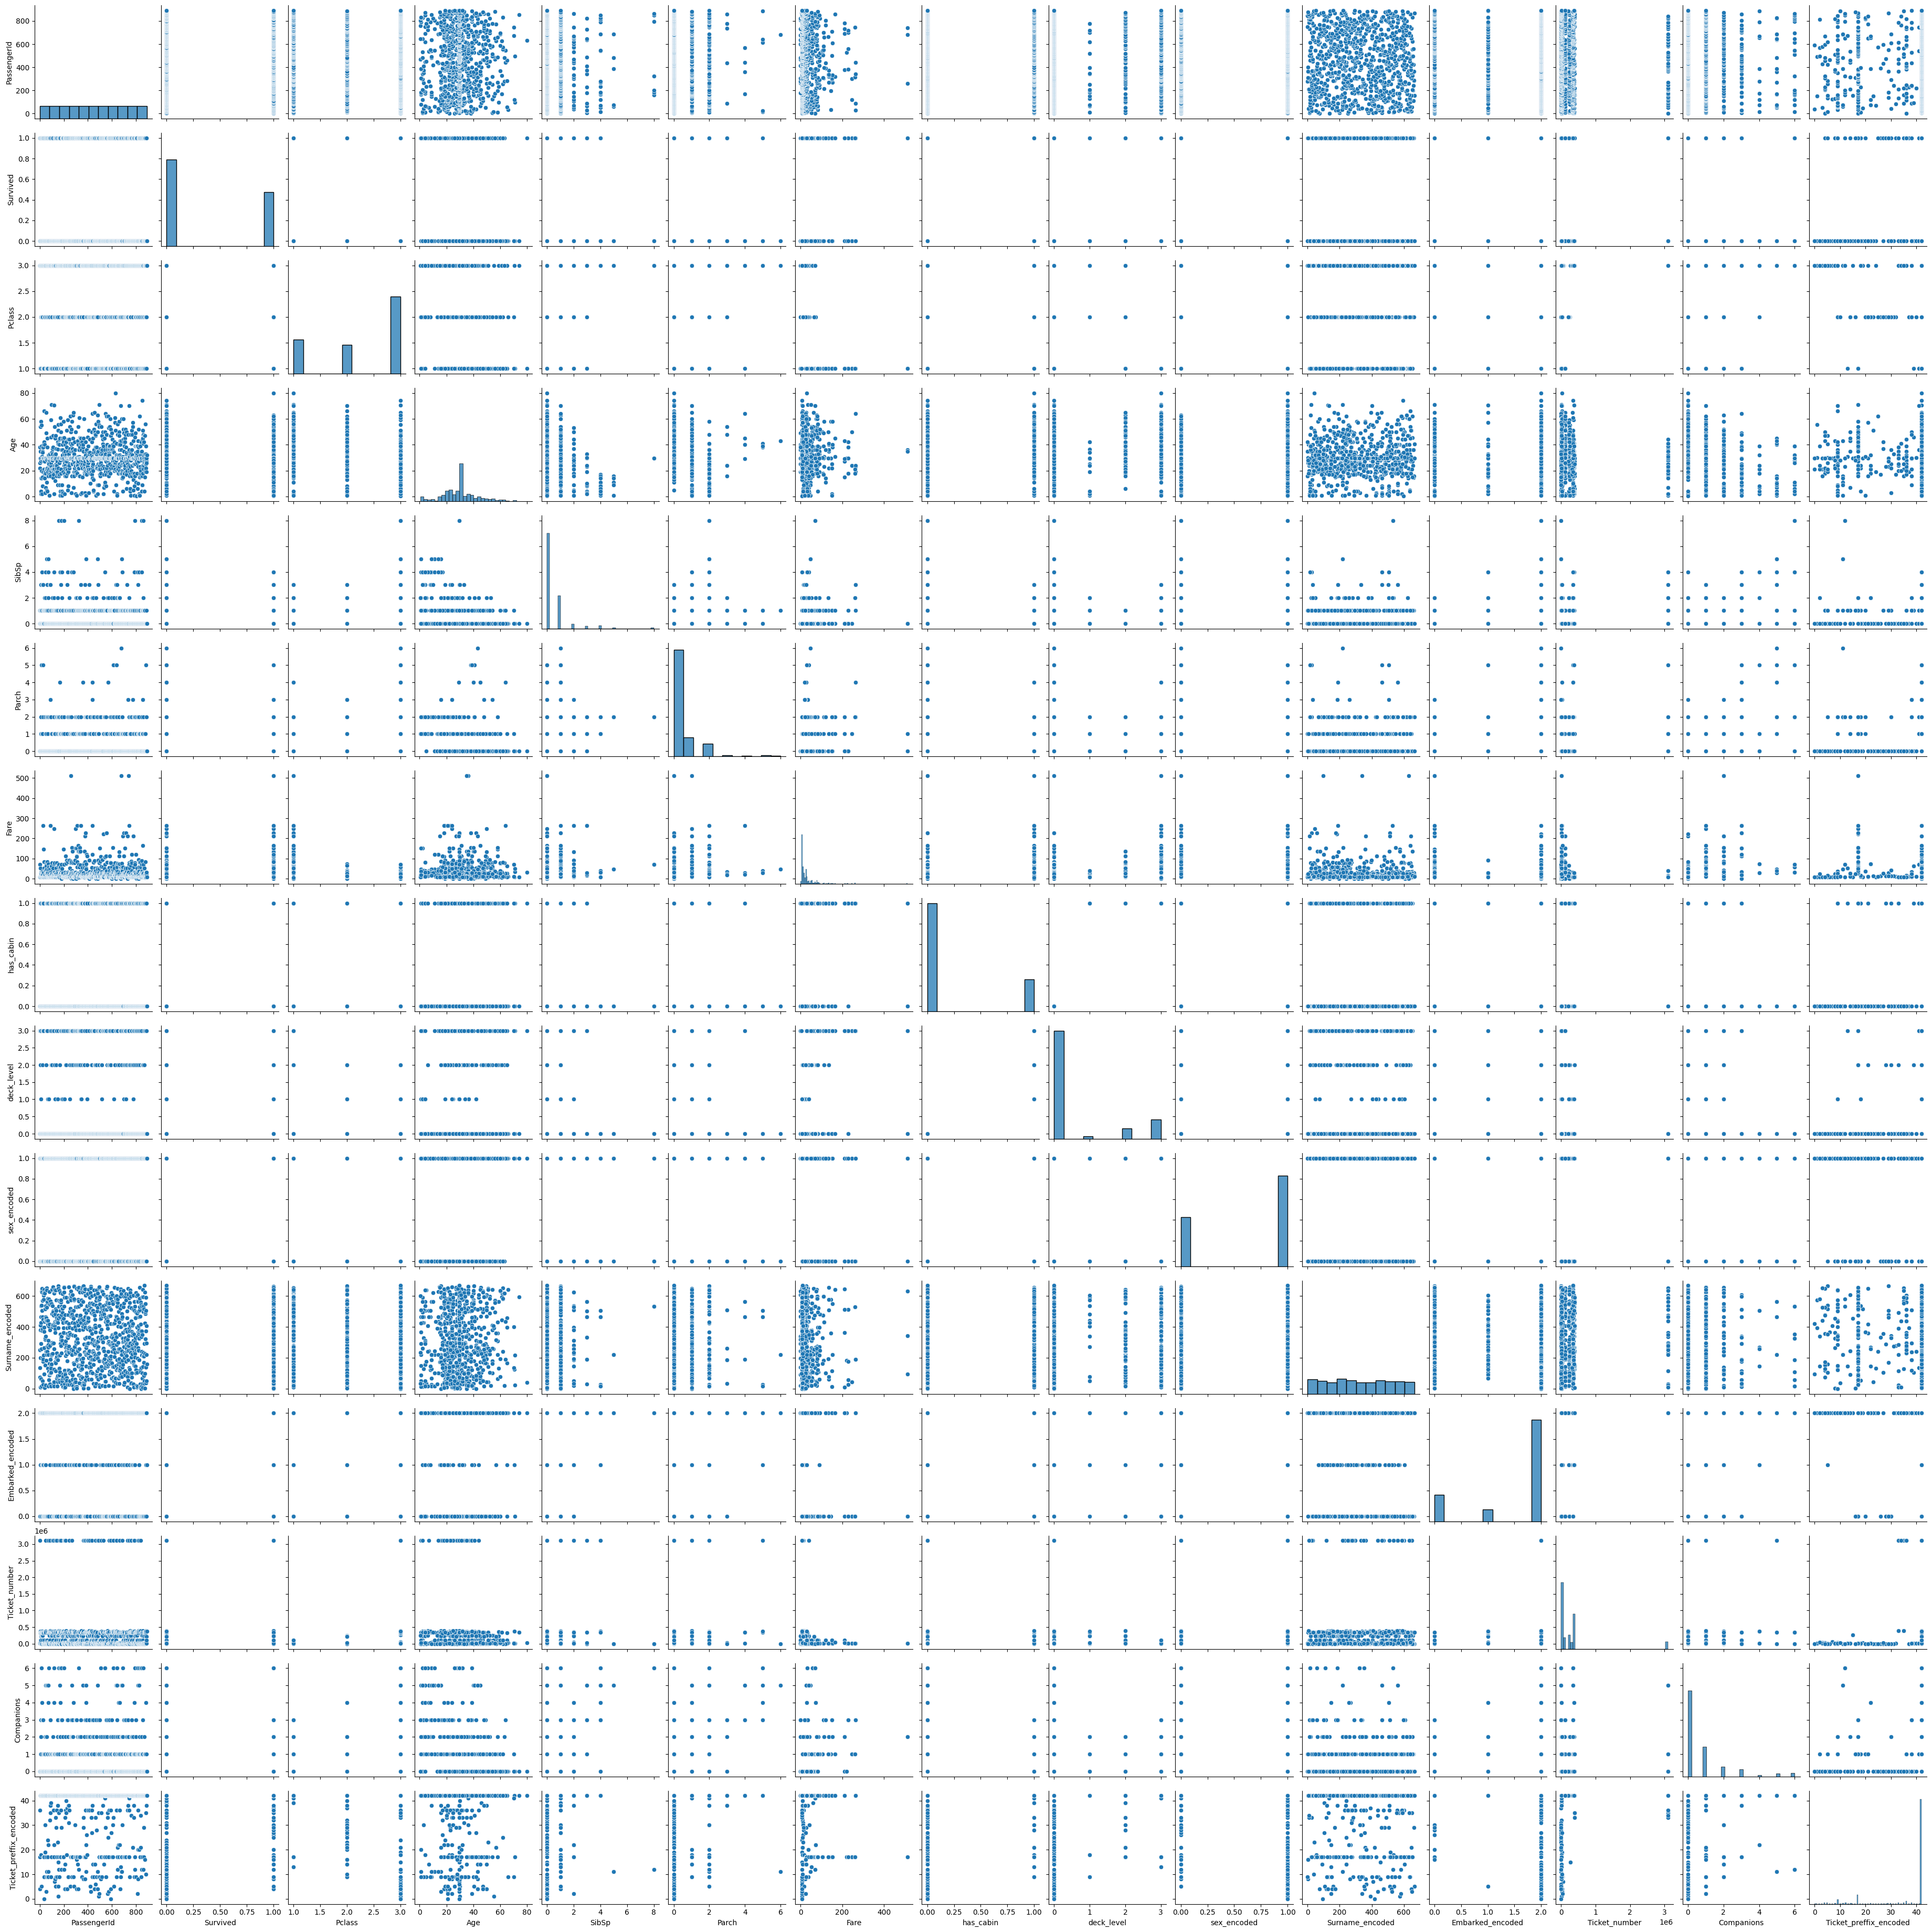

In [294]:
sns.pairplot(df)

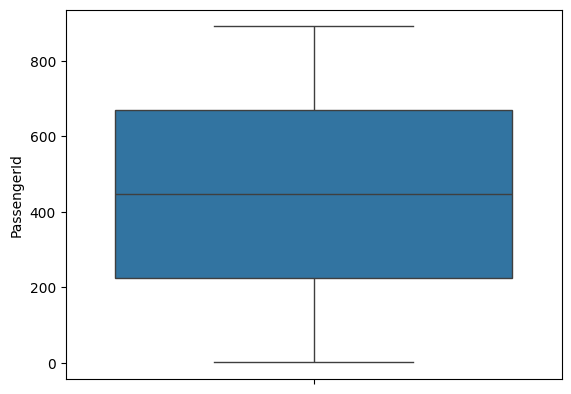

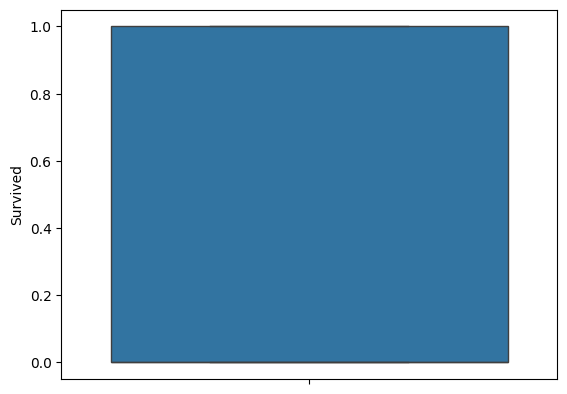

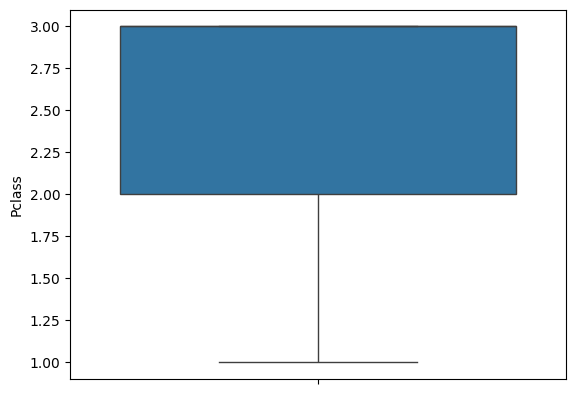

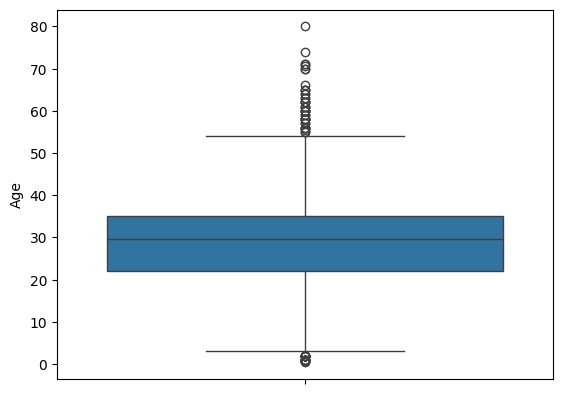

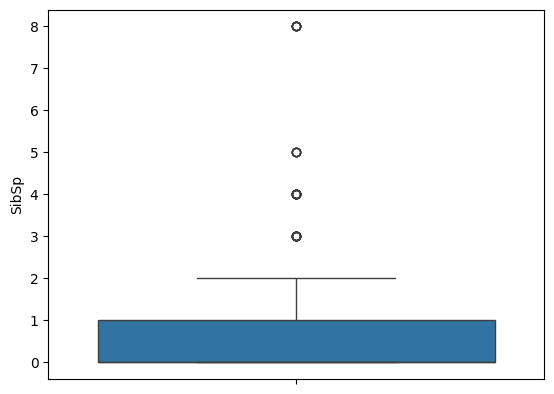

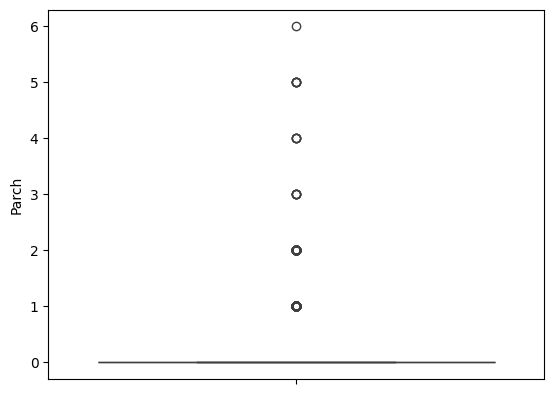

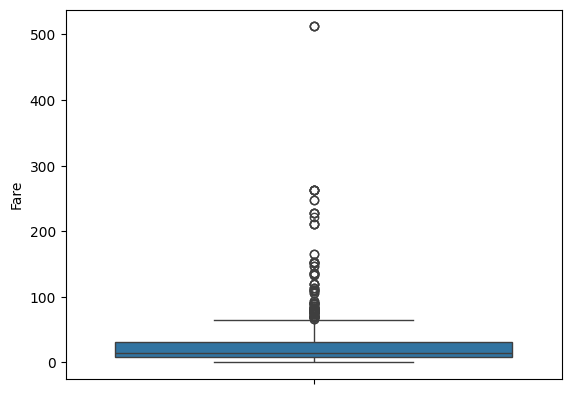

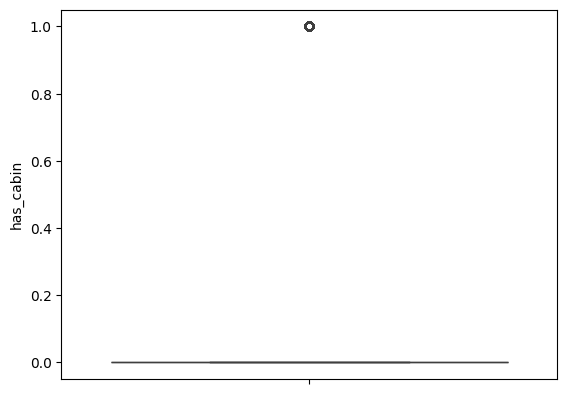

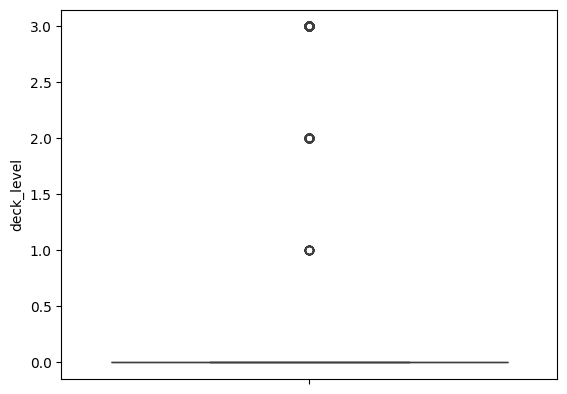

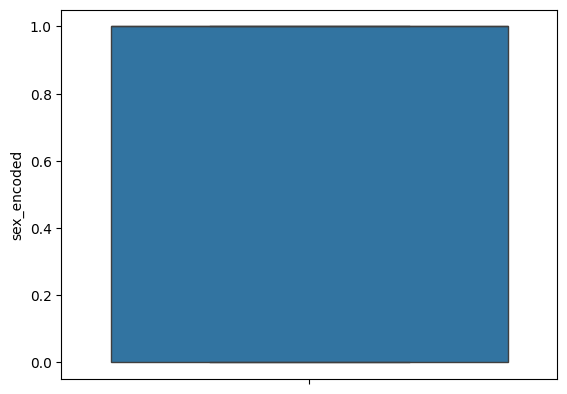

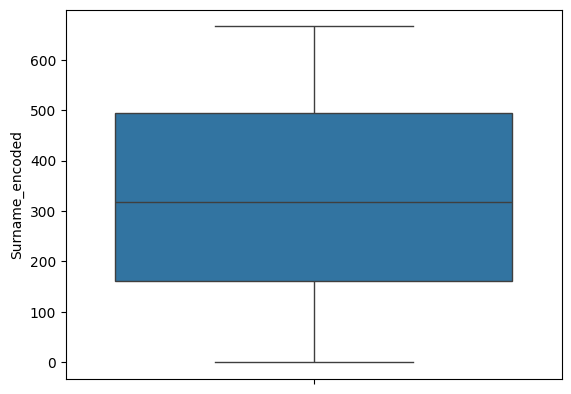

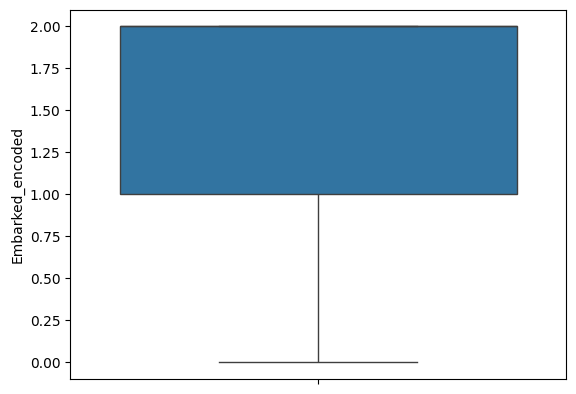

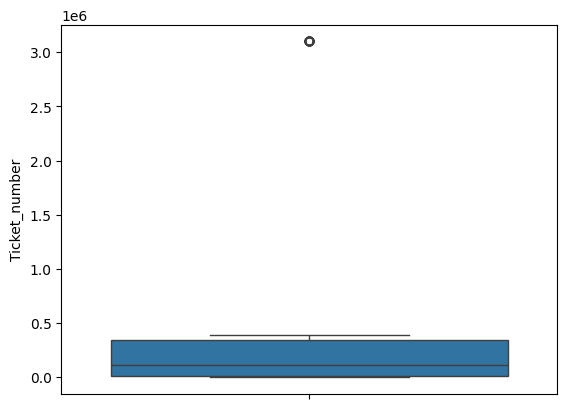

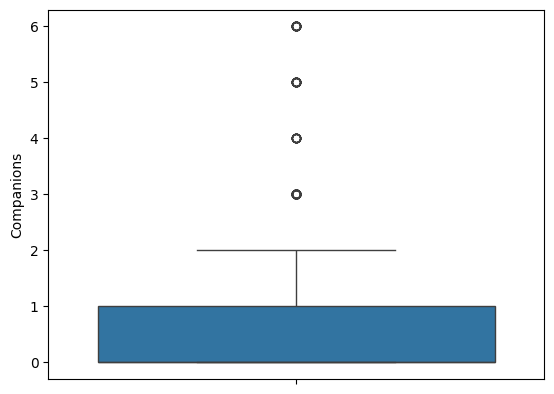

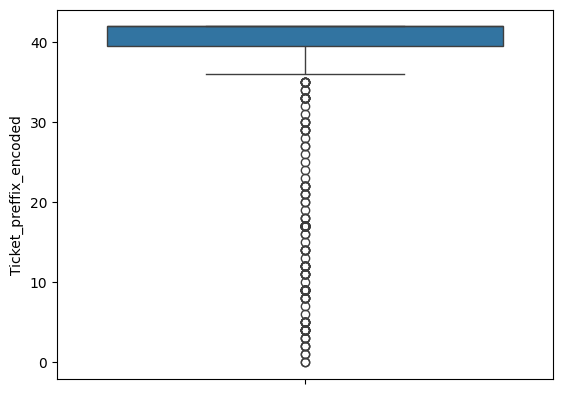

In [295]:
for j in df.columns:
  sns.boxplot(df[j])
  plt.show()

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


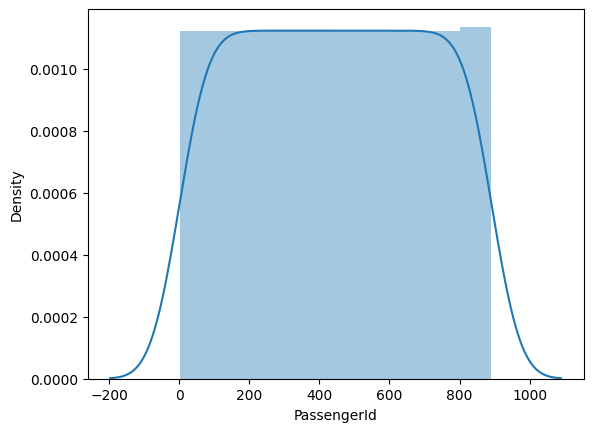

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


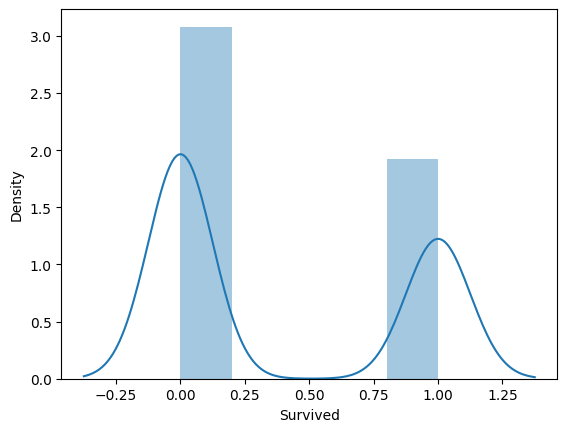

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


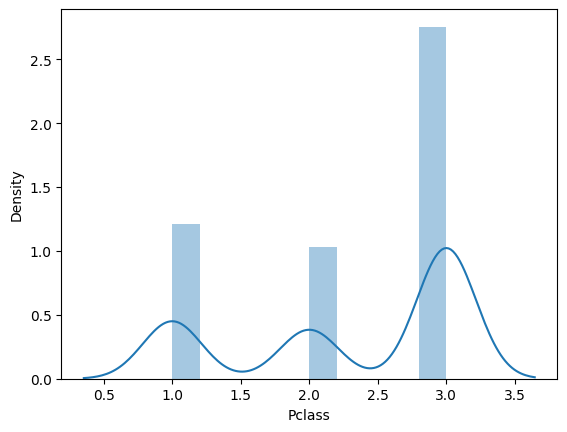

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


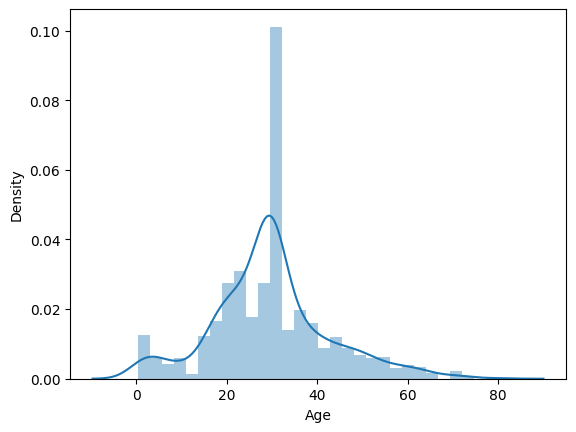

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


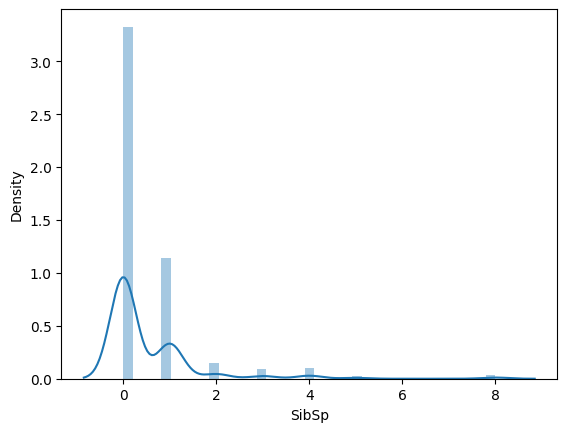

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


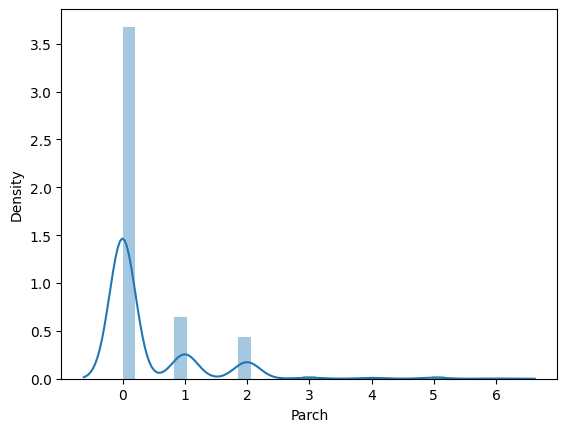

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


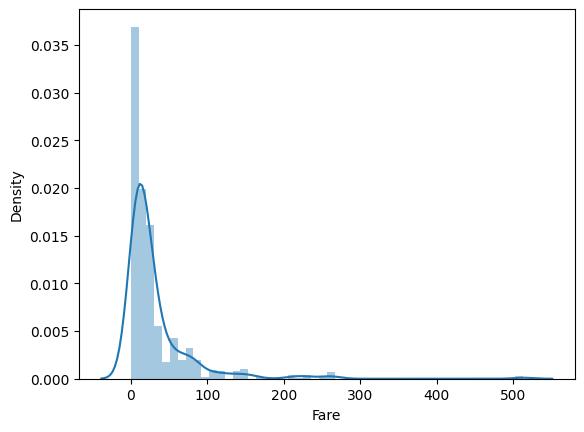

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


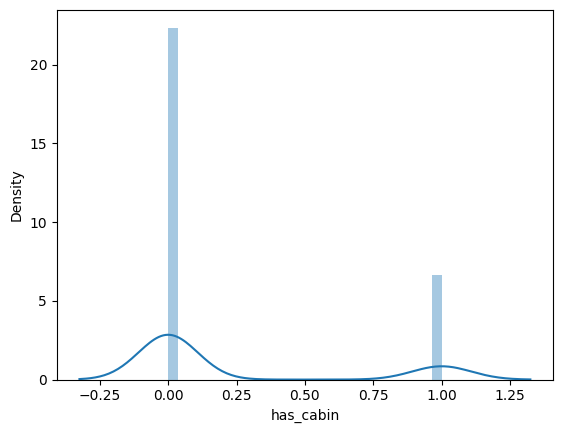

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


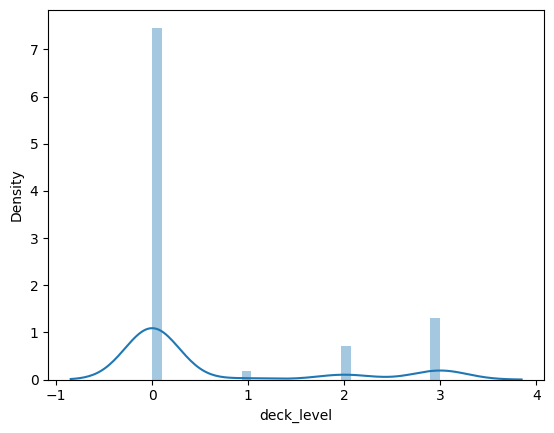

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


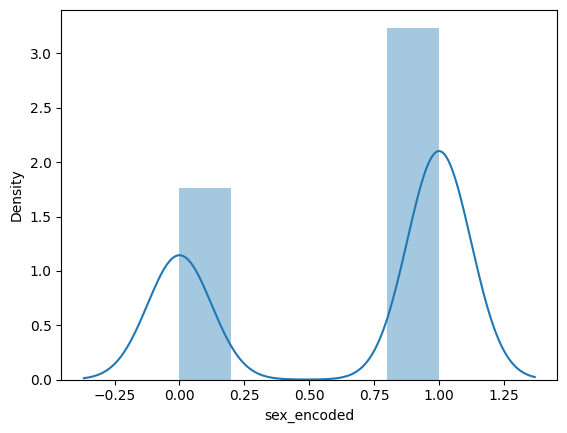

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


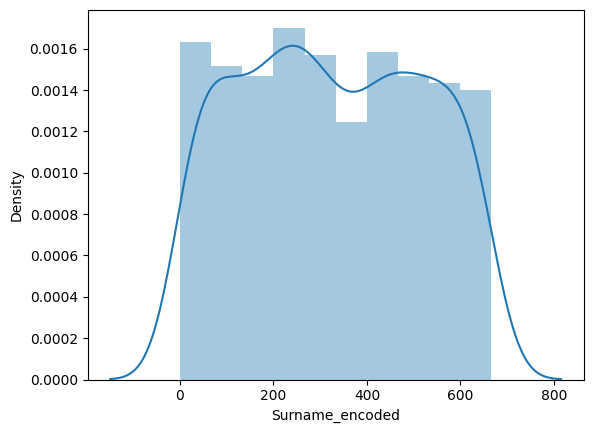

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


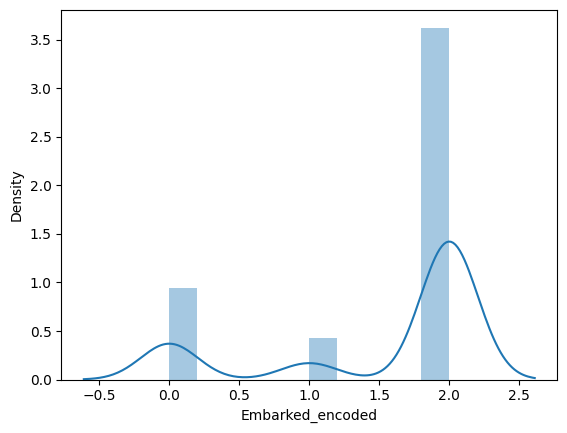

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


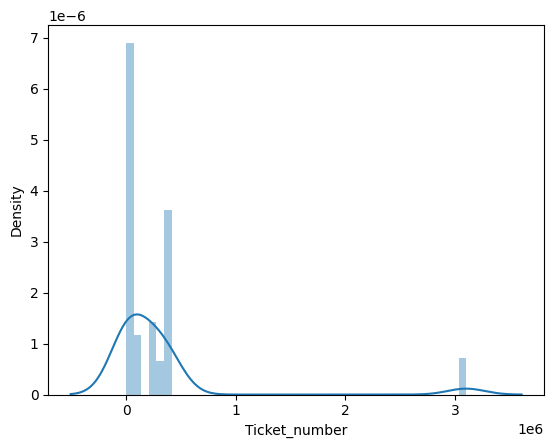

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


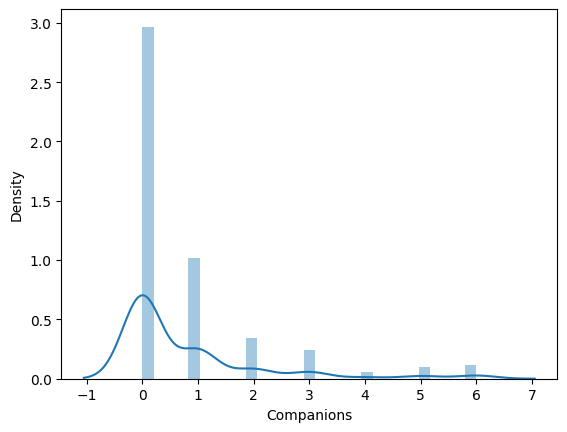

<ipython-input-296-7d8daa74a689>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j])


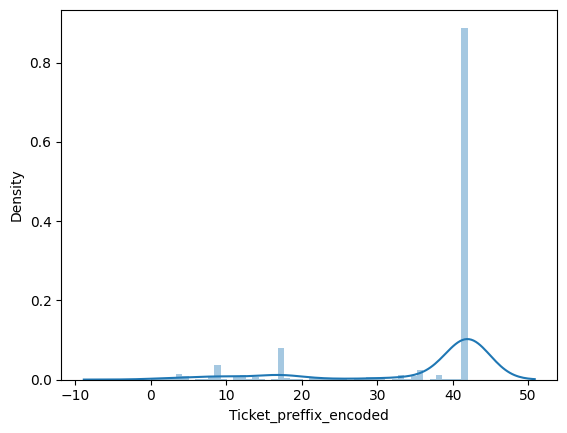

In [296]:
for j in df.columns:
  sns.distplot(df[j])
  plt.show()

In [297]:
for j in df.columns:
  print(df[j].skew())

0.0
0.4785234382949897
-0.6305479068752845
0.4344880940129925
3.6953517271630565
2.7491170471010933
4.787316519674893
1.2923667408185486
1.5208291367799696
-0.6189208484871986
0.03380707733371518
-1.2648230716558655
3.8232167281887954
2.220637843609385
-1.7236154610059582


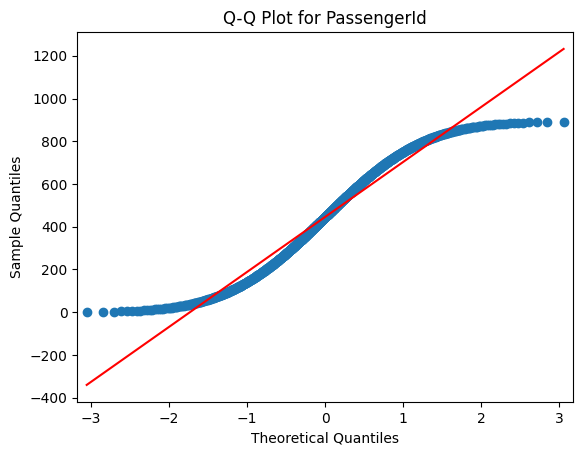

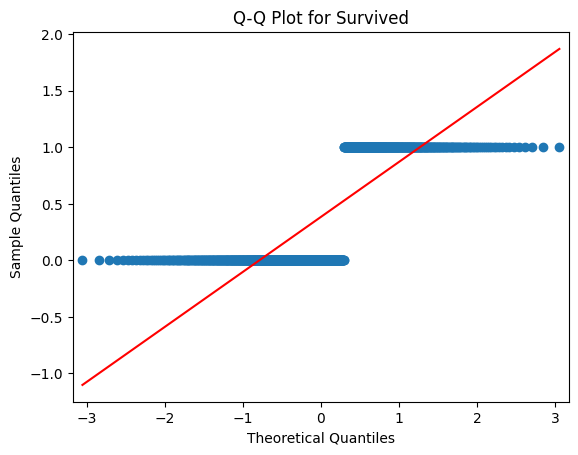

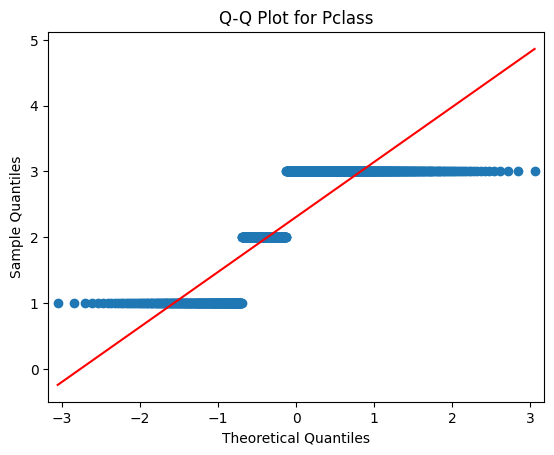

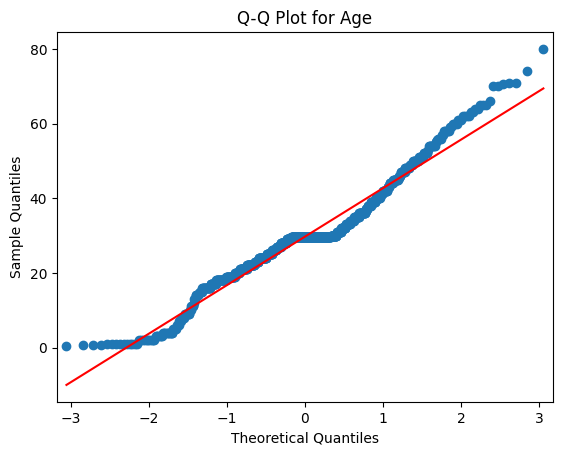

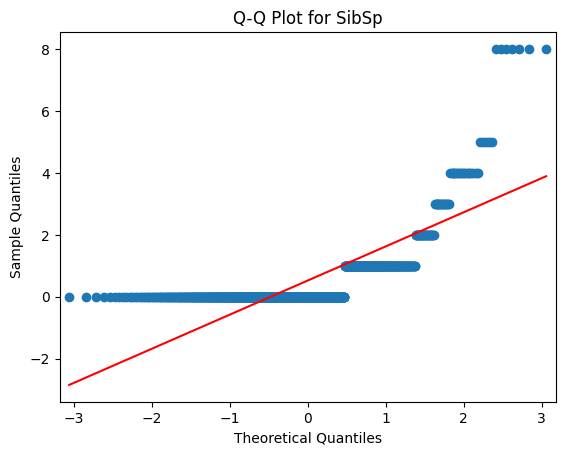

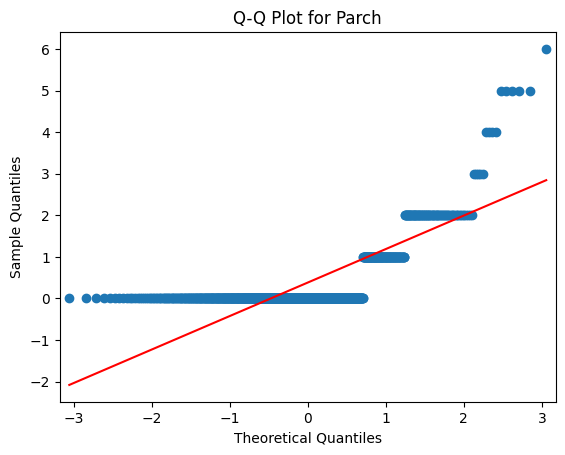

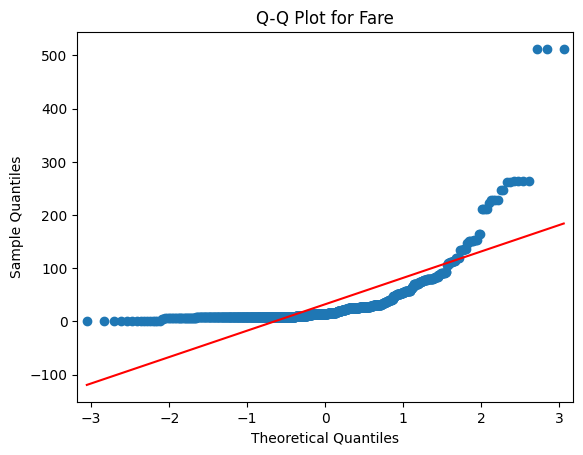

KeyError: 'has_cabin'

In [298]:
# prompt: plot the q-q plot on top of data['Age']

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate Q-Q plot for 'Age'
for j in df.columns:
  sm.qqplot(data[j], line='s')
  plt.title('Q-Q Plot for {0}'.format(j))
  plt.show()

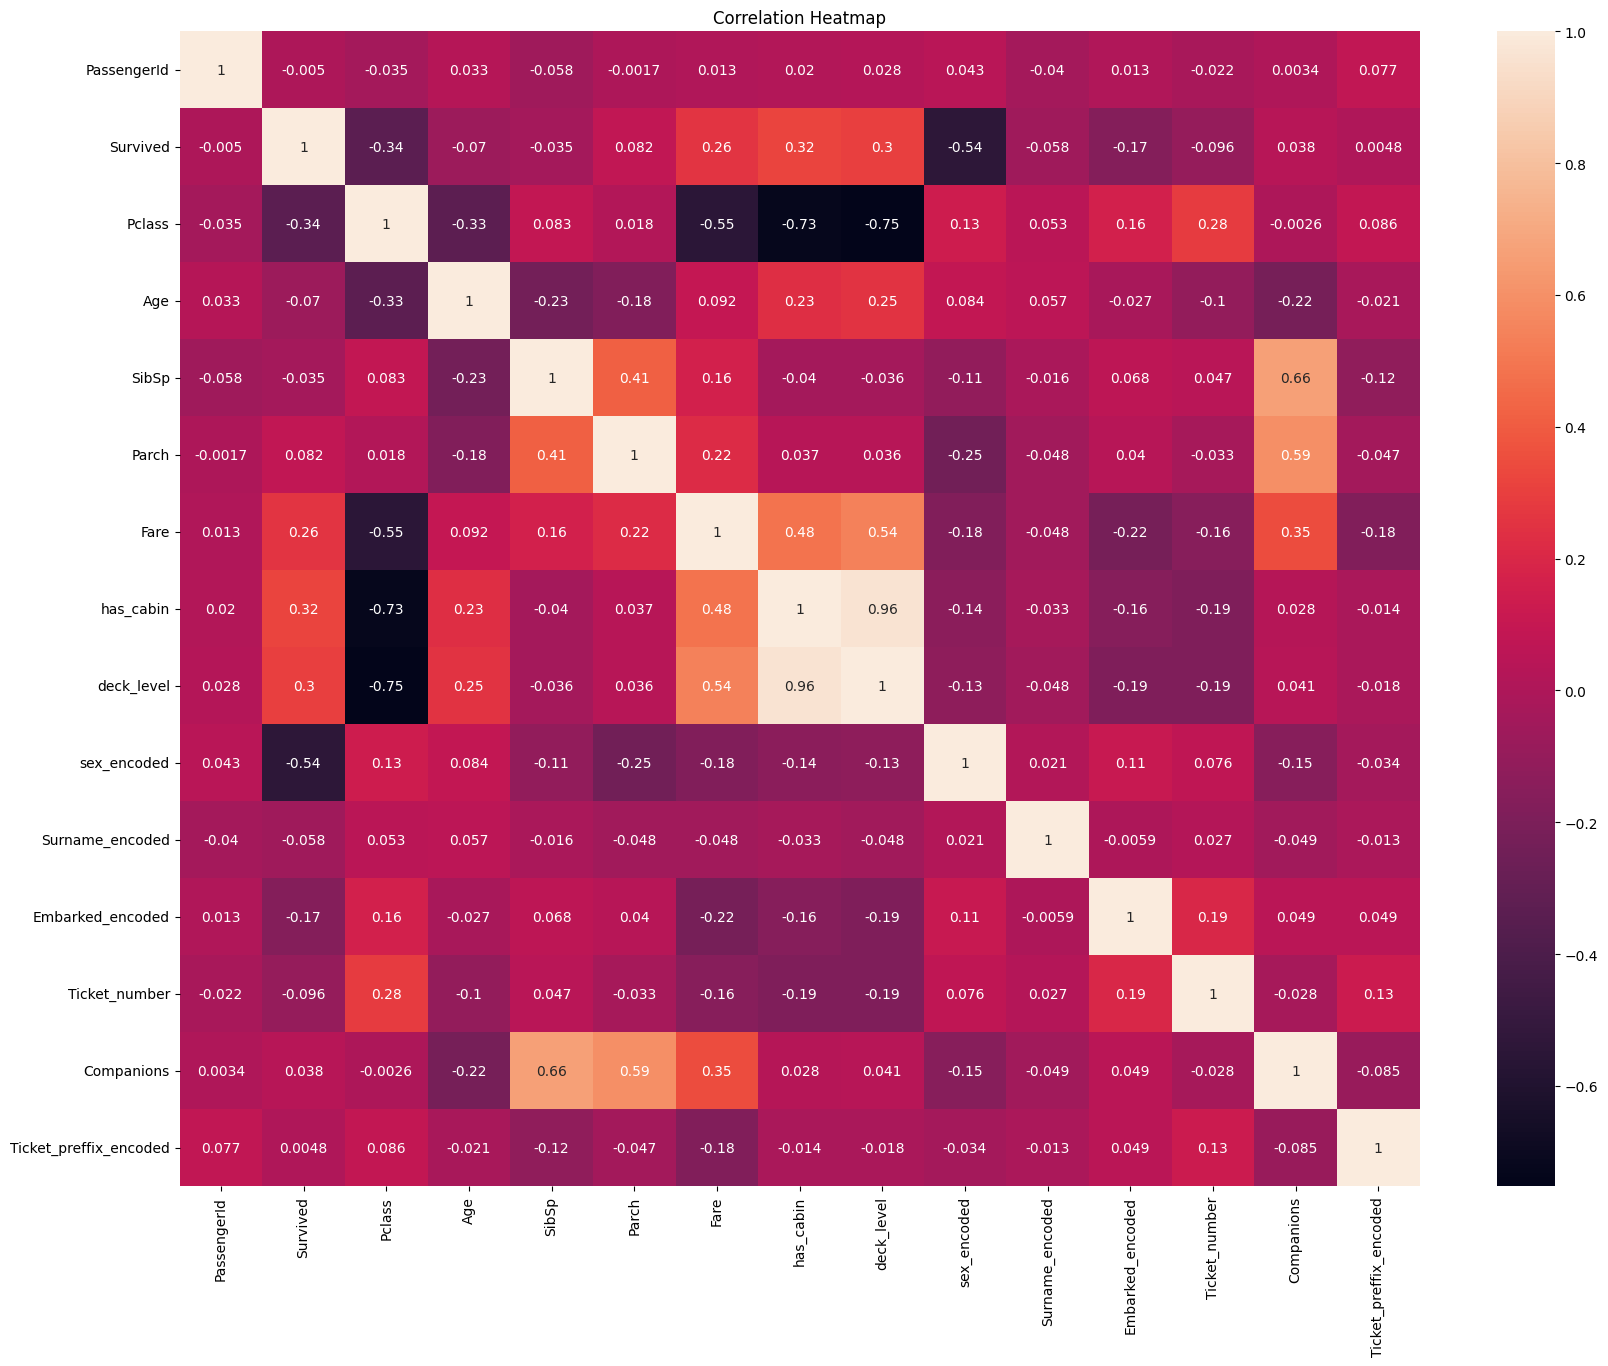

In [299]:
# prompt: increase the plot size 'sns.heatmap(df.corr(),annot=True)

# Create a heatmap to visualize correlation
plt.figure(figsize=(20, 15))  # Increase plot size
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [301]:
df.drop(columns=['Companions'],axis=1,inplace=True)

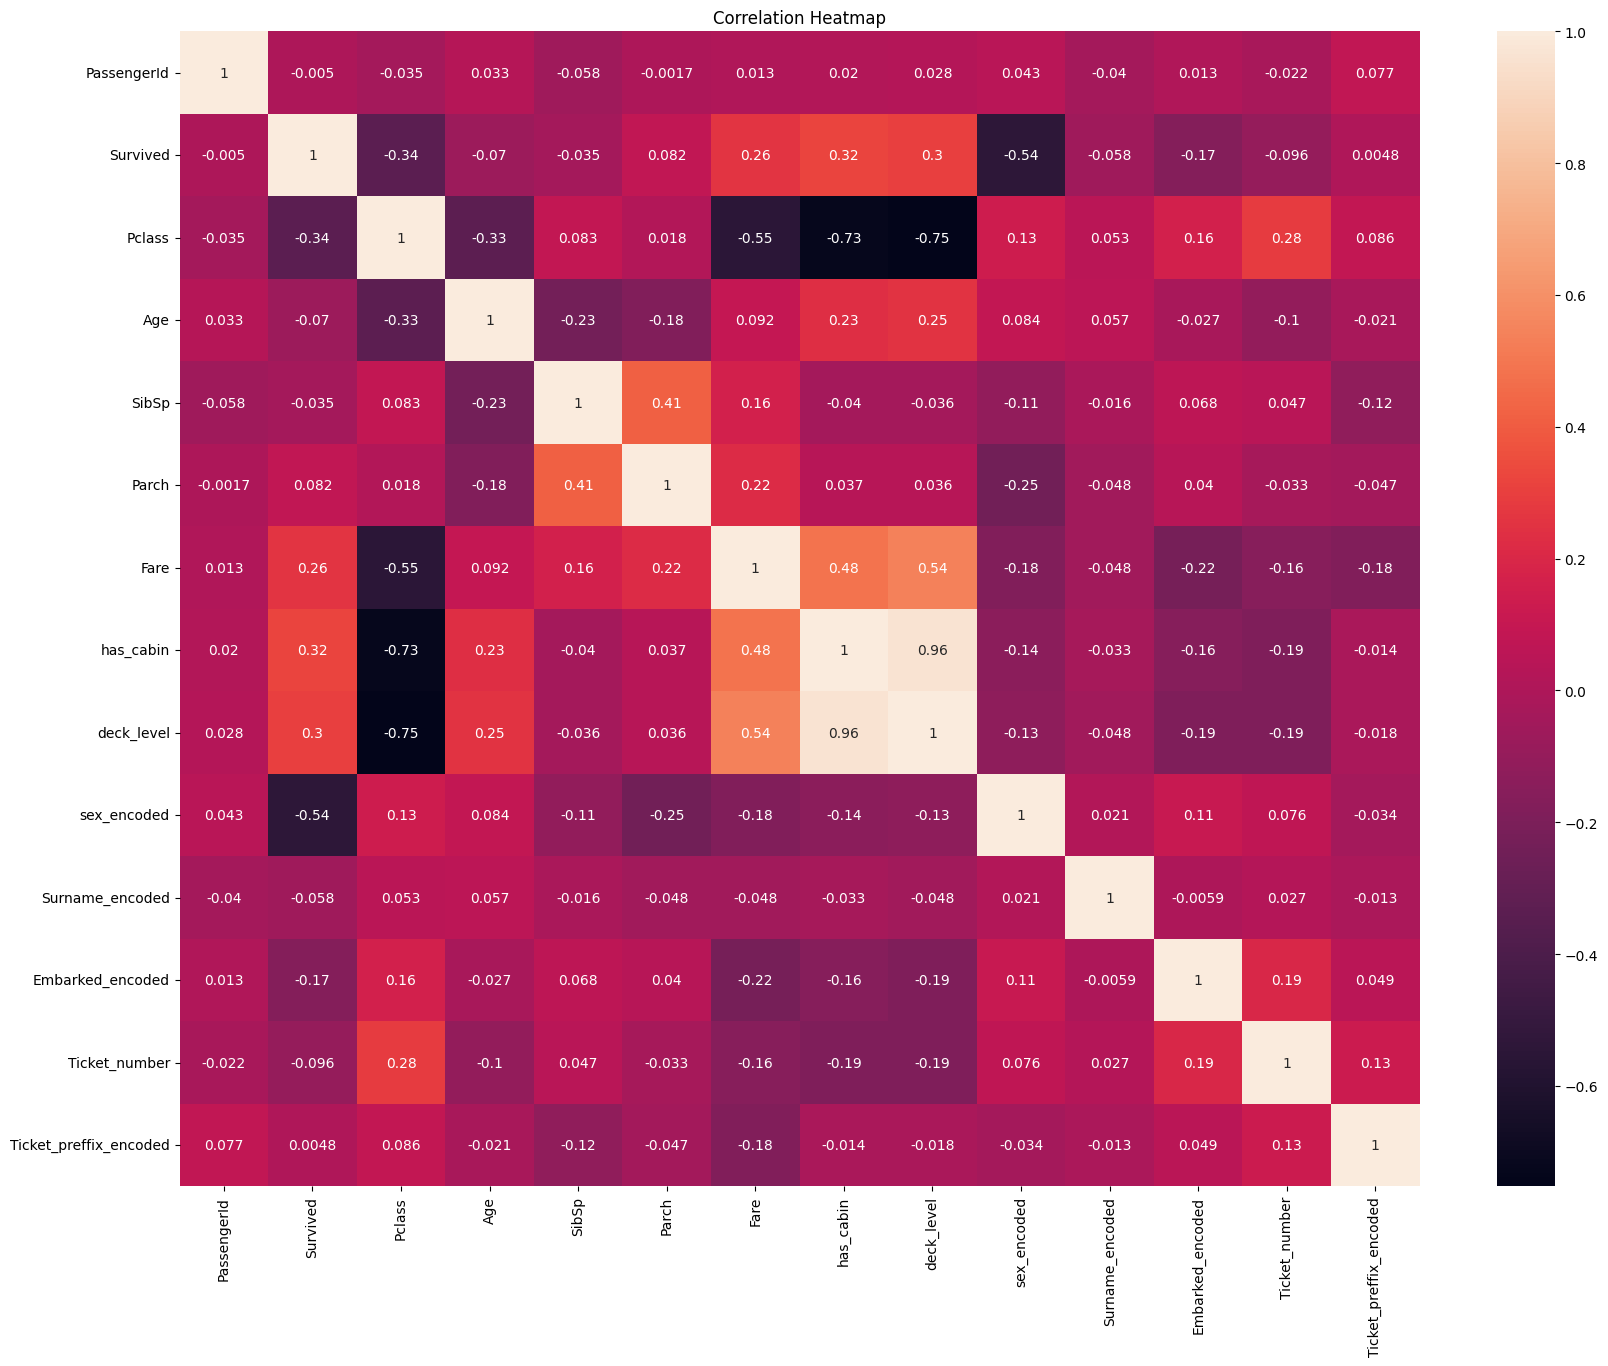

In [302]:
# prompt: increase the plot size 'sns.heatmap(df.corr(),annot=True)

# Create a heatmap to visualize correlation
plt.figure(figsize=(20, 15))  # Increase plot size
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [303]:
df.drop(columns=['PassengerId'],axis=1,inplace=True)

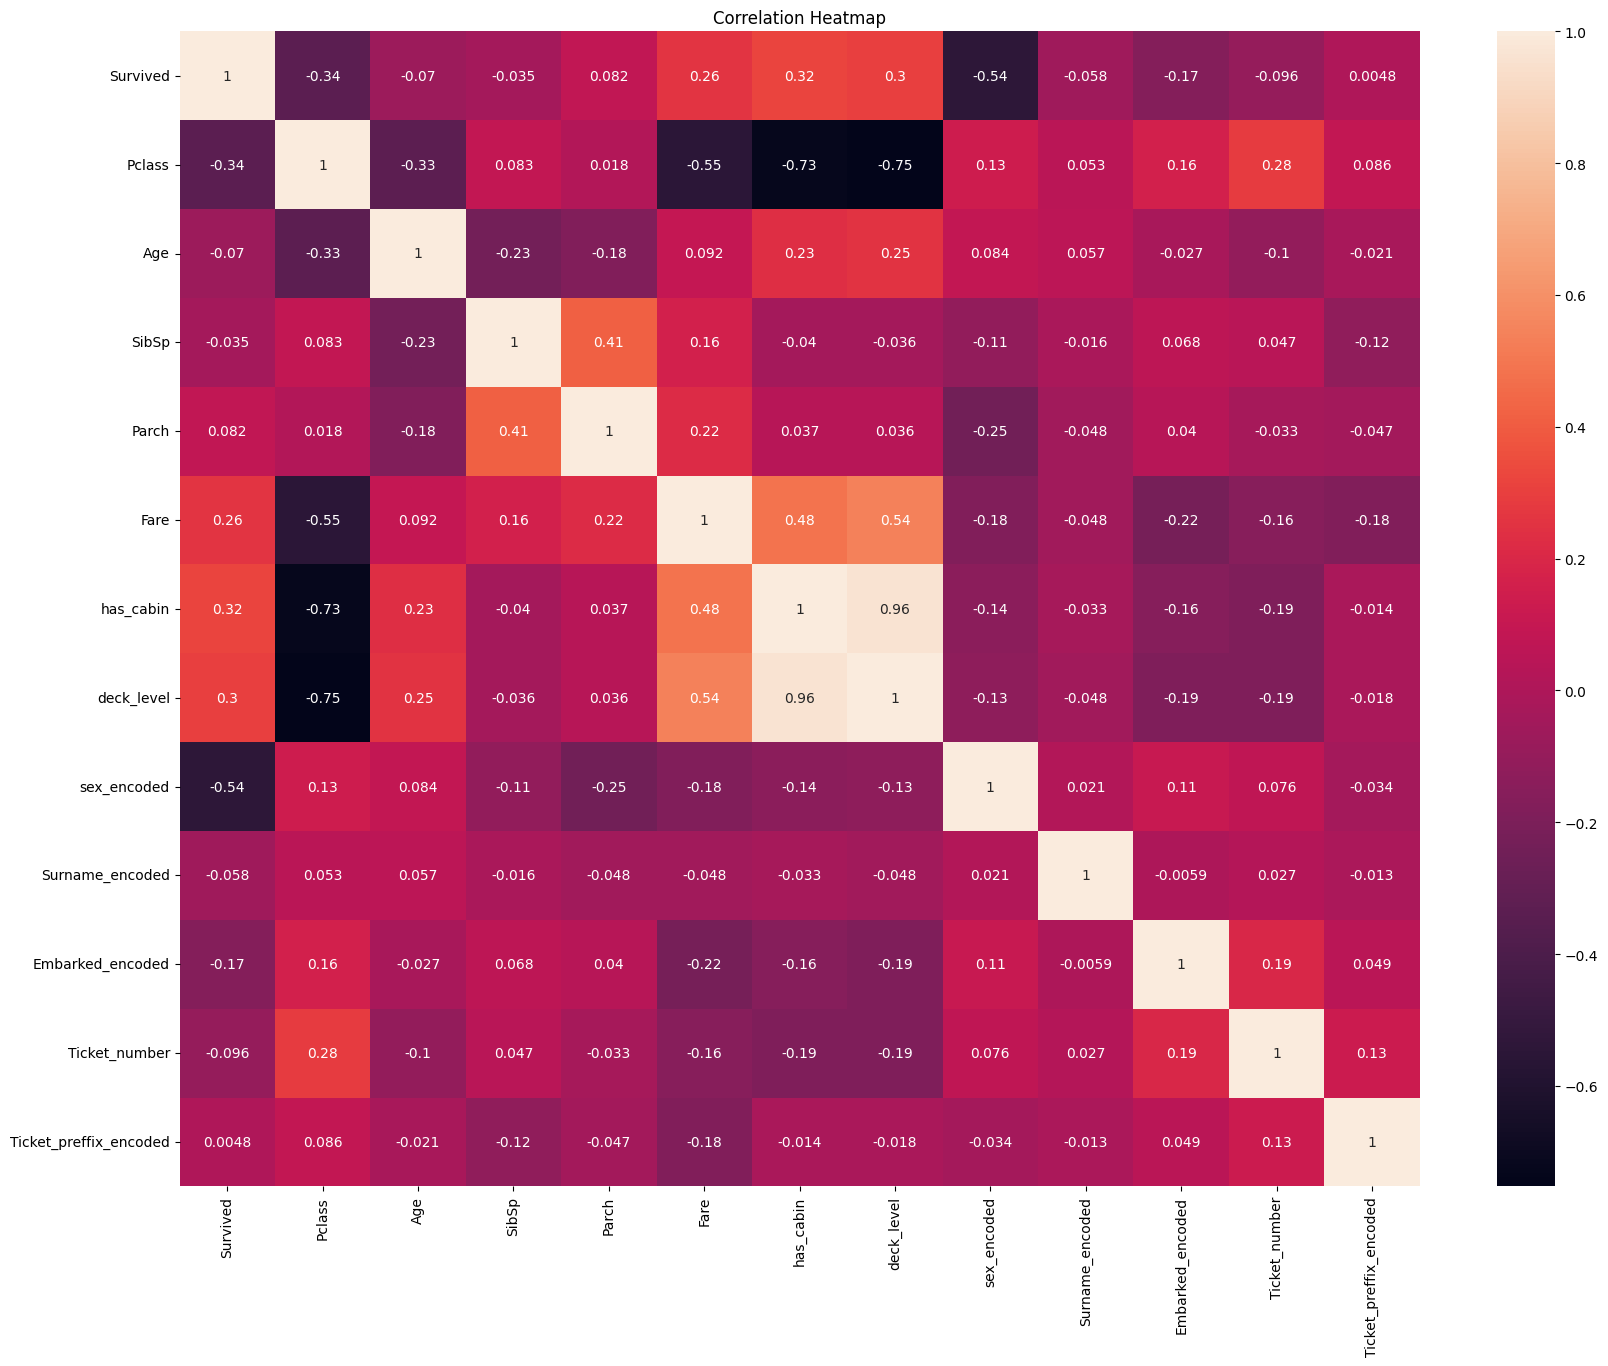

In [304]:
# prompt: increase the plot size 'sns.heatmap(df.corr(),annot=True)

# Create a heatmap to visualize correlation
plt.figure(figsize=(20, 15))  # Increase plot size
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [305]:
df.drop(columns=['Ticket_preffix_encoded'],axis=1,inplace=True)

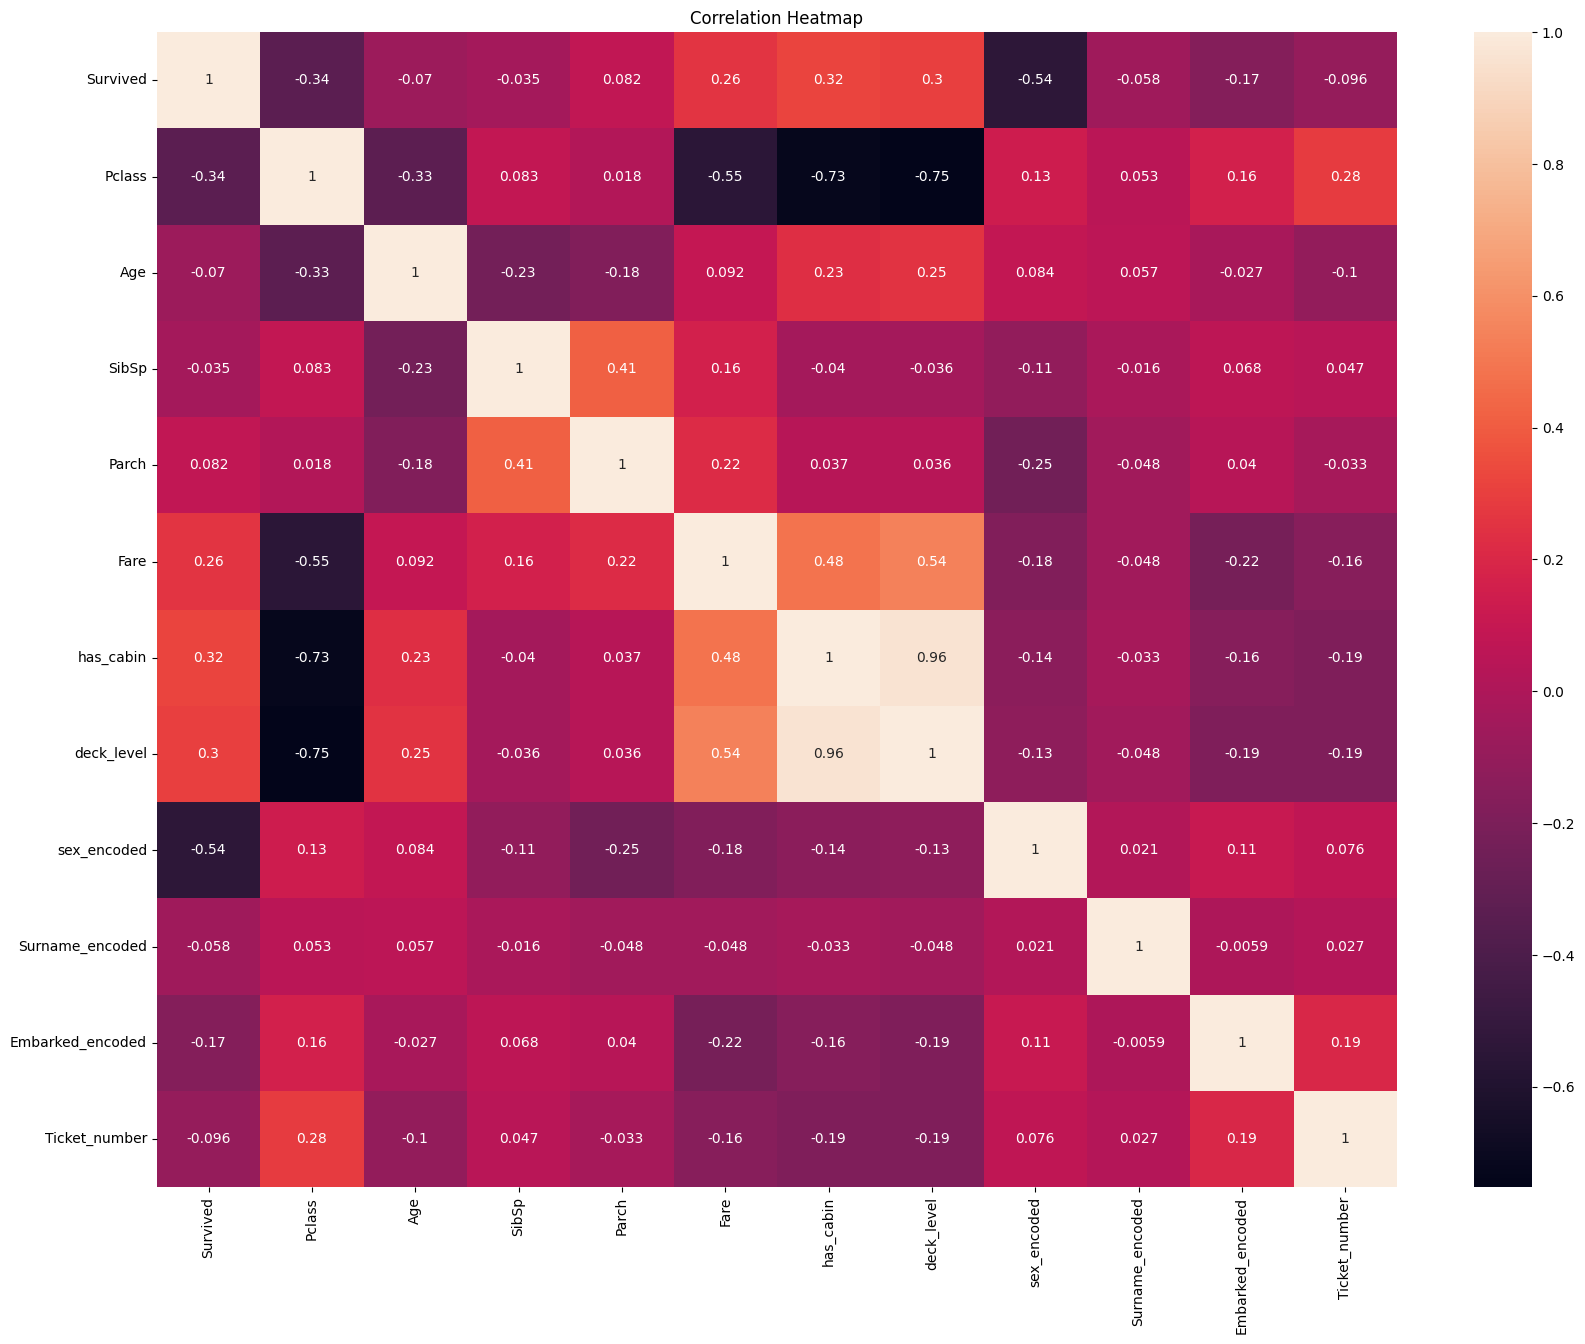

In [306]:
# prompt: increase the plot size 'sns.heatmap(df.corr(),annot=True)

# Create a heatmap to visualize correlation
plt.figure(figsize=(20, 15))  # Increase plot size
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [307]:
# prompt: apply Recursive Feature Elimination (RFE) on my dataset for finding the best features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Create a logistic regression model (you can use other models as well)
model = LogisticRegression()

# Create an RFE object with the model and desired number of features
rfe = RFE(estimator=model, n_features_to_select=5) # You can adjust the number of features

# Fit the RFE object to your data
rfe.fit(X, y)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# You can now use the selected features for your model training

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [308]:
missging= df.isnull().sum().sum()
total=np.product(df.shape)

percentages=(missging/total)*100

In [309]:
print(percentages)

0.009352787130564907


In [310]:
df.isnull().sum()

Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
has_cabin           0
deck_level          1
sex_encoded         0
Surname_encoded     0
Embarked_encoded    0
Ticket_number       0
dtype: int64

In [312]:
df['deck_level'].value_counts()

deck_level
0.0    687
3.0    121
2.0     65
1.0     17
Name: count, dtype: int64

In [313]:
df['deck_level'].fillna(df['deck_level'].mode()[0],inplace=True)

<ipython-input-313-c0673a6cdcb5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['deck_level'].fillna(df['deck_level'].mode()[0],inplace=True)


In [314]:
df.isnull().sum()

Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
has_cabin           0
deck_level          0
sex_encoded         0
Surname_encoded     0
Embarked_encoded    0
Ticket_number       0
dtype: int64

In [320]:
len(df.columns)

12

In [321]:
# prompt: apply Recursive Feature Elimination (RFE) on my dataset for finding the best features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Create a logistic regression model (you can use other models as well)
model = LogisticRegression()

# Create an RFE object with the model and desired number of features
rfe = RFE(estimator=model, n_features_to_select=10) # You can adjust the number of features

# Fit the RFE object to your data
rfe.fit(X, y)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# You can now use the selected features for your model training

Selected Features:
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'has_cabin', 'deck_level',
       'sex_encoded', 'Surname_encoded', 'Embarked_encoded'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# These are the most important features from the dataset selected by the RFE Model : 'Pclass', 'SibSp', 'has_cabin', 'sex_encoded', 'Embarked_encoded'

In [322]:
df_selected=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'has_cabin', 'deck_level',
       'sex_encoded', 'Surname_encoded', 'Embarked_encoded']]

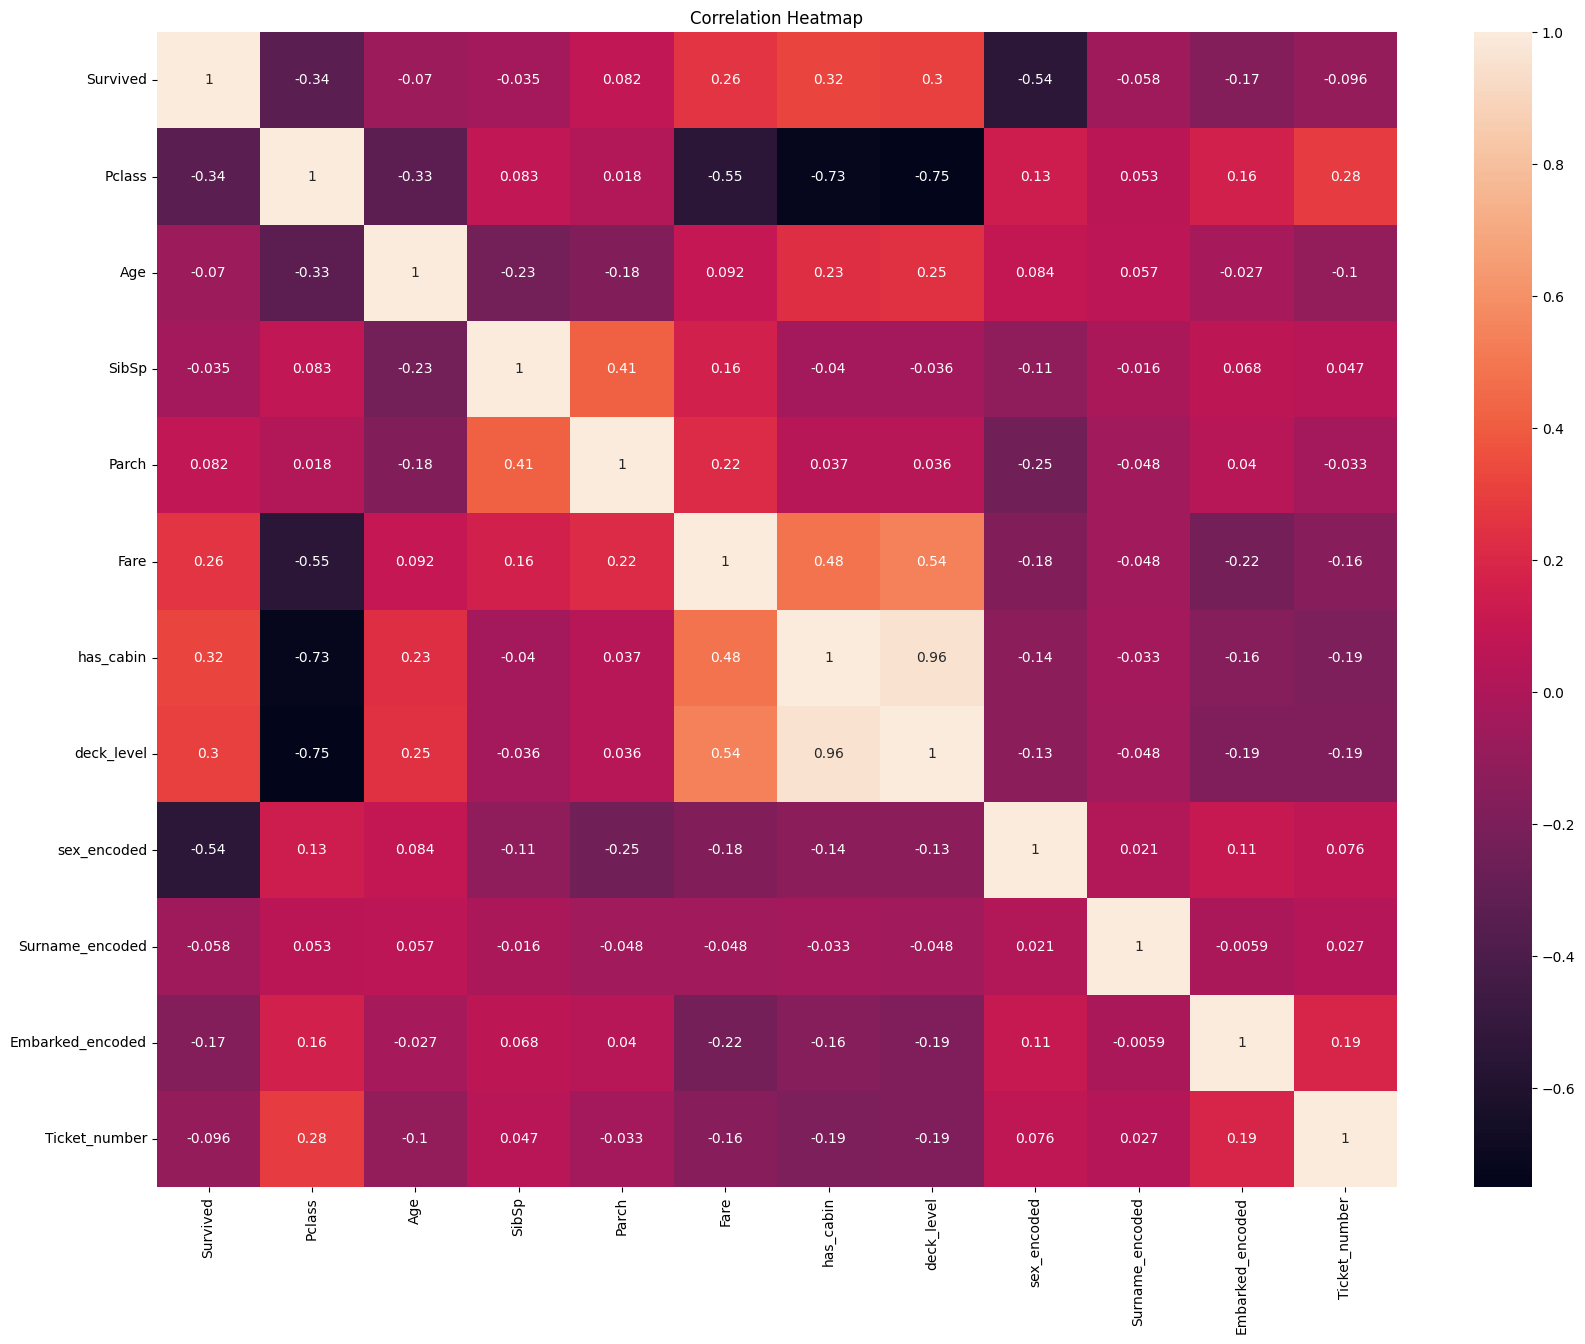

In [324]:
# prompt: increase the plot size 'sns.heatmap(df.corr(),annot=True)

# Create a heatmap to visualize correlation
plt.figure(figsize=(20, 15))  # Increase plot size
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [375]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_selected, df['Survived'], test_size=0.2, random_state=42)

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [377]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [378]:
model=LogisticRegression()

In [379]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [380]:
ypred=model.predict(x_test)

In [381]:
print(accuracy_score(y_test,ypred))

0.7877094972067039


In [382]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [383]:
print(confusion_matrix(y_test,ypred))

[[88 17]
 [21 53]]


In [384]:
trainpred=model.predict(x_train)

In [385]:
print(accuracy_score(y_train,trainpred))

0.7963483146067416


In [338]:
print(classification_report(y_train,trainpred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       444
           1       0.76      0.68      0.71       268

    accuracy                           0.80       712
   macro avg       0.79      0.77      0.78       712
weighted avg       0.79      0.80      0.79       712



In [339]:
testdata=pd.read_csv('test.csv')

# what are the techniques applied on train data

In [340]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [346]:
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  has_cabin  deck_level  \
0         0       3  22.0      1      0   7.2500          0         0.0   
1         1       1  38.0      1      0  71.2833          1         3.0   
2         1       3  26.0      0      0   7.9250          0         0.0   
3         1       1  35.0      1      0  53.1000          1         3.0   
4         0       3  35.0      0      0   8.0500          0         0.0   

   sex_encoded  Surname_encoded  Embarked_encoded  Ticket_number  
0            1               73                 2          21171  
1            0              136                 0          17599  
2            0              251                 2        3101282  
3            0              198                 2         113803  
4            1               11                 2         373450

In [348]:
x=df.iloc[:,1:]

In [349]:
y=df.iloc[:,0]

In [351]:
# prompt: import selectkbest

from sklearn.feature_selection import SelectKBest, f_classif

In [353]:
# prompt: import chi2 function

from sklearn.feature_selection import chi2

In [354]:
bestfeatures=SelectKBest(score_func=chi2,k=10)

In [355]:
fit=bestfeatures.fit(x,y)

In [356]:
dfscores=pd.DataFrame(fit.scores_)

In [357]:
dfcolumns=pd.DataFrame(x.columns)

In [358]:
dfscores

0
0   3.087370e+01
1   2.468793e+01
2   2.581865e+00
3   1.009750e+01
4   4.518319e+03
5   6.899741e+01
6   1.701101e+02
7   9.270245e+01
8   3.452224e+02
9   1.020252e+01
10  1.180327e+07

In [361]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'has_cabin',
       'deck_level', 'sex_encoded', 'Surname_encoded', 'Embarked_encoded',
       'Ticket_number'],
      dtype='object')

In [359]:
dfcolumns

0
0             Pclass
1                Age
2              SibSp
3              Parch
4               Fare
5          has_cabin
6         deck_level
7        sex_encoded
8    Surname_encoded
9   Embarked_encoded
10     Ticket_number

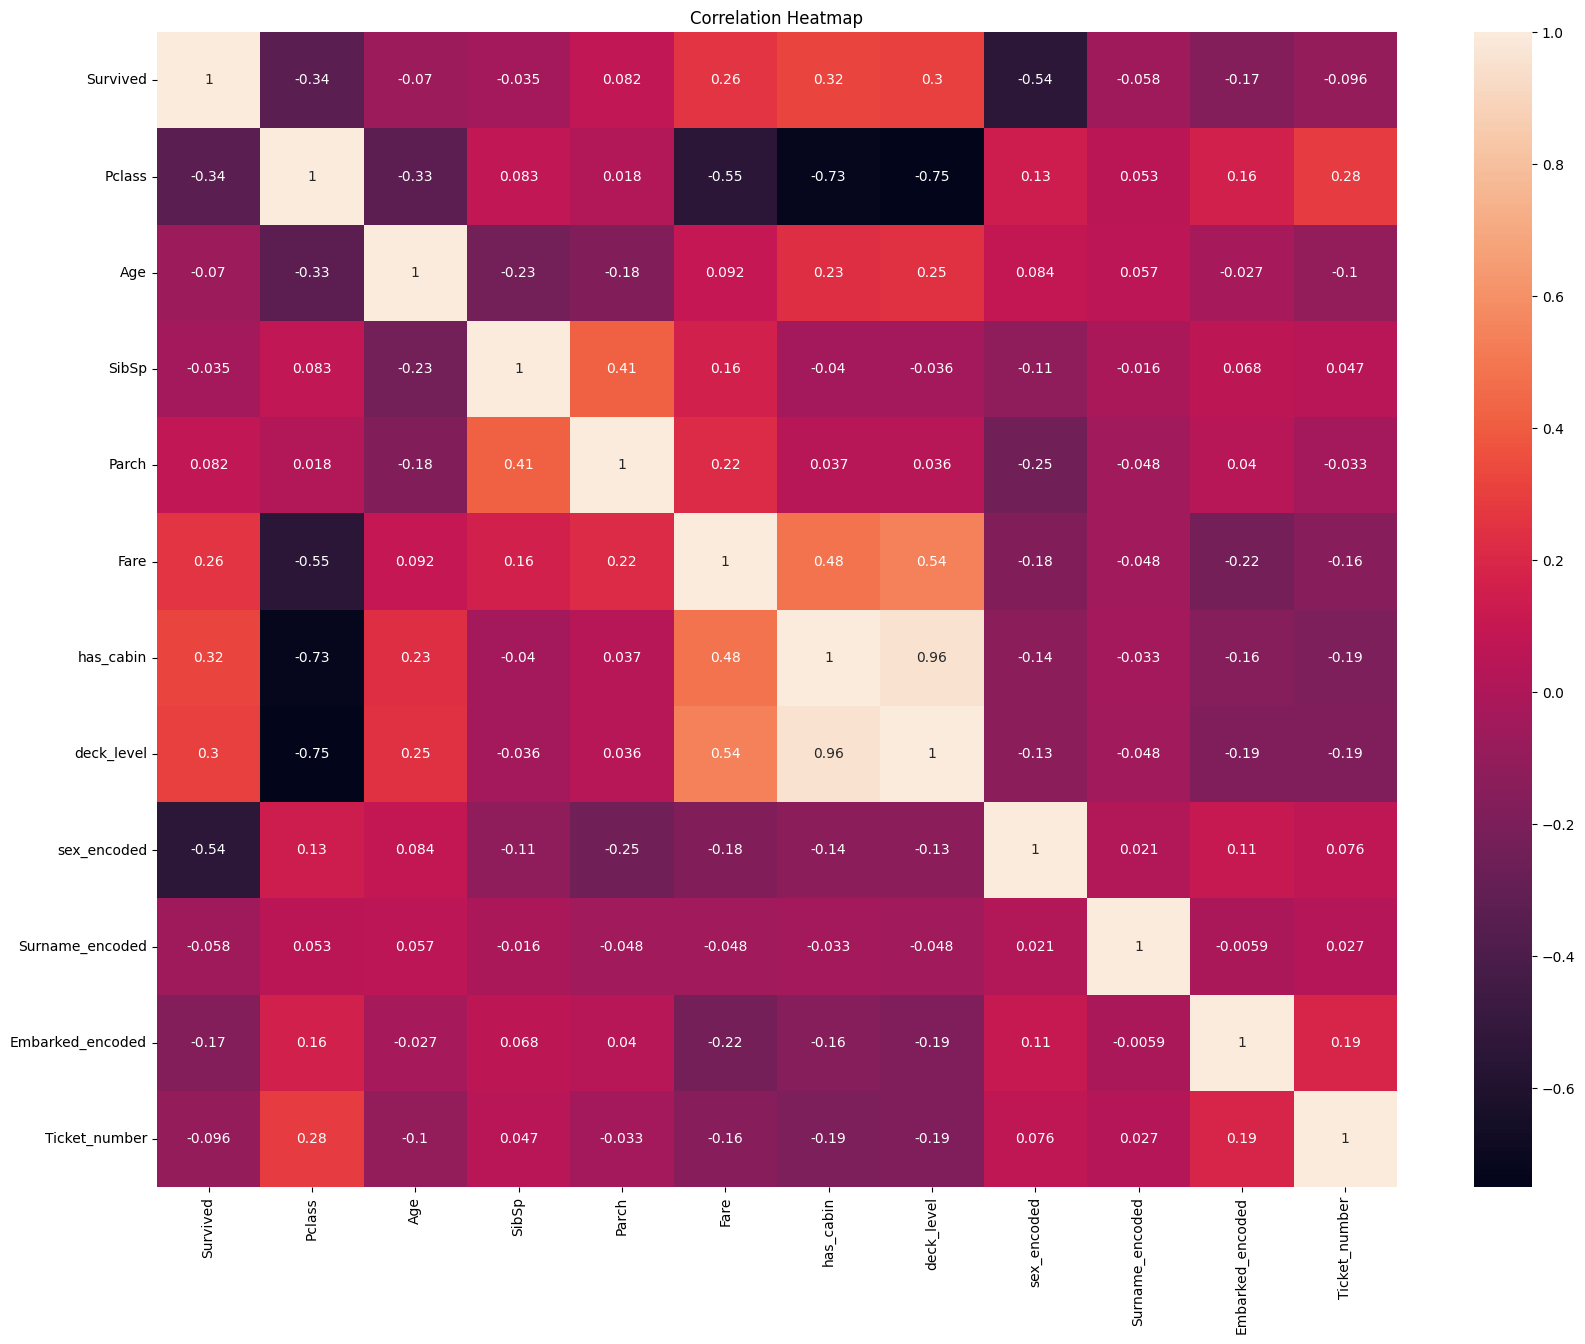

In [360]:
# prompt: increase the plot size 'sns.heatmap(df.corr(),annot=True)

# Create a heatmap to visualize correlation
plt.figure(figsize=(20, 15))  # Increase plot size
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [362]:
dfcolumns

0
0             Pclass
1                Age
2              SibSp
3              Parch
4               Fare
5          has_cabin
6         deck_level
7        sex_encoded
8    Surname_encoded
9   Embarked_encoded
10     Ticket_number

In [366]:
dt=list(dfcolumns.values)

In [367]:
dt

[array(['Pclass'], dtype=object),
 array(['Age'], dtype=object),
 array(['SibSp'], dtype=object),
 array(['Parch'], dtype=object),
 array(['Fare'], dtype=object),
 array(['has_cabin'], dtype=object),
 array(['deck_level'], dtype=object),
 array(['sex_encoded'], dtype=object),
 array(['Surname_encoded'], dtype=object),
 array(['Embarked_encoded'], dtype=object),
 array(['Ticket_number'], dtype=object)]

In [368]:
dte=df[['Pclass','Age','SibSp','Parch','Fare','has_cabin','deck_level','sex_encoded','Surname_encoded','Embarked_encoded','Ticket_number']]

In [369]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dte, df['Survived'], test_size=0.2, random_state=42)

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#

In [371]:
modell=LogisticRegression()

In [372]:
modell.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [373]:
ypredd=modell.predict(x_test)

In [374]:
print(accuracy_score(y_test,ypredd))

0.664804469273743
